# **Colab ব্যবহারকারীদের জন্য নোট**

# **সোজাসুজি এই ফাইলে লিখবেন না—তাহলে কাজ হারিয়ে যেতে পারে!**

# **শুরু করার আগে অবশ্যই একটা কপি করে নিন।**

কপি 만드는 পদ্ধতি

1. টপ লেফটে “File”-এ ক্লিক করুন।  
> *যদি হেডার (যেমন “File” বা “Runtime”) না দেখায়, ওপর ডান দিকে থাকা “v” মার্কে ক্লিক করে দেখান।*

2. “Save a copy in Drive” এ ক্লিক করুন।

3. কপি করা ফাইলের নাম বদলিয়ে **YOURNAMEs_FileName.ipynb** রাখুন।  
> উদাহরণ: আপনার নাম Olivia হলে: Olivias_FileName.ipynb

4. আপনার runtime **CPU**-তে সেট করুন।  
T4 GPU CPU থেকে বেশি বার session রিসেট করে।<br>  
সুতরাং GPU না লাগলে CPU runtime ব্যবহার করাই ভালো।<br>  
এই [ভিডিওটি](https://youtu.be/XRmI-qRiFFw) দেখুন।<br>

> যদি runtime মাঝখানে বদলান, তাহলে শুরু থেকে সব সেল আবার চালাতে হবে।<br>  
> কাজ শুরু করার আগে runtime ঠিক করে নিন।<br>  
> *সেলগুলো আবার চালানোর জন্য: টপ লেফটে “Runtime” → তারপর “Run before” এ ক্লিক করুন।*<br>

---

* চেকমার্ক (✅) সংরক্ষিত থাকবে না। Chrome-এর refresh বাটন দিয়ে পেজ রিফ্রেশ করলে সেগুলো চলে যাবে।  
বিরতি দিয়ে পরে চালাতে চাইলে, একটা টেক্সট সেল যোগ করে “SO FAR DONE” লিখে রাখুন।

---

* Colab-এ **প্রতিটি আগের আউটপুট ৩০ থেকে ৯০ মিনিটে রিসেট হয়।**<br>  
  এজন্য `~~ is not defined` টাইপ এরর **বহুবার হয়**।

  🔁 `~~ is not defined` এরর এলে করণীয়  
  1. প্রথমে নিশ্চিত হোন ভেরিয়েবলটি ঠিক লেখা আছে।<br>  
  2. ঠিক থাকলেও সমস্যা হলে, **যে সেল আবার চালাতে চান সেখানে ক্লিক করুন।**<br>  
  3. “Runtime” (টপ লেফট) → “Run before” এ যান।<br>  
     → এতে **সব আগের সেল আবার চালানো হবে।**  
  4. এখন ওই সেলটি আবার চালান।

  এসব করলে ও সমস্যা থাকলে,<br>  
  হয়তো আগের সেলগুলোর আপনার TODO উত্তরে ভুল আছে।<br>  
  উত্তর ঠিক আছে কিনা ভালো করে দেখুন।<br>  
  অথবা ChatGPT বা অন্য কোডিং সহায়ক থেকে সাহায্য নিন।

# **Preparation**

এই অংশ শুধুমাত্র আগের Chapter-গুলোর বিষয়বস্তু লোড করে।<br>
কোড রান করুন—পড়তে হবে না।<br>
চলুন, সরাসরি এগিয়ে যান।<br>

In [ ]:
# ফাইল ডাউনলোড করুন
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt
# আপনি যেই input.text ফাইলটি ডাউনলোড করেছেন সেটি utf-8 এ লোড করুন।
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

# টেনসর সুন্দরভাবে দেখানোর ফাংশন (আপনি চাইলে এ অংশ বাদ দিতে পারেন)
import torch
import torch.nn as nn

def print_formatted_tensor(*args, width=6, decimals=2):
    """
        A function that neatly formats and displays a PyTorch Tensor, and also prints its size.

    Example usage:
        print_formatted_tensor("নাম", tensor)
        print_formatted_tensor(tensor)

    Args:
        *args: If given 1 argument, it is treated as a tensor.
               If given 2 arguments, the first is treated as the name, the second as the tensor.
        width (int): Display width for each number (default: 6)
        decimals (int): Number of decimal places to show (default: 2)
    """
    
    # আর্গুমেন্ট থেকে টেনসর ও নাম নির্ধারণ করুন
    if not args:
        raise ValueError("At least one argument is required.")
    if isinstance(args[0], str):
        if len(args) < 2:
            raise ValueError("Tensor is not specified.")
        name, tensor = args[0], args[1]
    else:
        name, tensor = None, args[0]

    # টেনসরকে লিস্টে রূপান্তর করুন
    tensor_list = tensor.detach().cpu().tolist()

    def format_list(lst, indent):
        """রিকার্সিভভাবে নেস্ট করা তালিকা ফরম্যাট করে একটি স্ট্রিং হিসেবে ফেরত দেয়া"""
        # যদি বিষয়বস্তু তালিকা হয়, তবে পুনরায় রিটার্ন করুন
        if isinstance(lst, list) and lst and isinstance(lst[0], list):
            inner = ",\n".join(" " * indent + format_list(sub, indent + 2) for sub in lst)
            return "[\n" + inner + "\n" + " " * (indent - 2) + "]"
        # সংখ্যাসূচক তালিকার জন্য
        return "[" + ", ".join(f"{v:{width}.{decimals}f}" for v in lst) + "]"

    # ফরম্যাট করা স্ট্রিং (সবচেয়ে বাইরের ফ্রেমের বারের বন্ধনী সরানো হয়েছে)
    formatted = format_list(tensor_list, indent=9)
    inner_formatted = formatted[1:-1].strip()

    # ফলাফল আউটপুট
    if name:
        print(name)
    print(f"Tensor Size: {list(tensor.size())}")
    print("টেনসর([")
    print("# ইউজার ডেটা থেকে বয়স নির্ণয় করে ফাংশন
def calculate_age(birth_year, current_year):
    """জন্মবছর এবং বর্তমান বছর থেকে বয়স হিসাব করুন"""
    age = current_year - birth_year
    print(f"ব্যবহারকারীর বয়স: {age} বছর")
    return age" * 9 + inner_formatted)
    print("" * 7 + "])")

class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        # vocabulary সংখ্যা x embedding মাত্রার জন্য একটি এমবেডেড টেবিল সংজ্ঞায়িত করুন
        self.token_embedding_table = nn.Embedding(vocab_size, embedding_dim)

    def embed(self, input_indices):
        # ইনপুট ইনডেক্সের সাথে সম্পর্কিত এম্বেডেড ভেক্টর পান
        return self.token_embedding_table.forward(input_indices)

# একটি পজিশন এম্বেডেড মডিউল সংজ্ঞায়িত করা হচ্ছে
class PositionEmbedding(nn.Module):
    def __init__(self, input_sequence_length, embedding_dim):
        super().__init__()
        # অবস্থান এমবেডিং স্তর
        self.position_embedding_layer = nn.Embedding(input_sequence_length, embedding_dim)

    def forward(self, input_indices):
        sequence_length = input_indices.shape[1]  # সিকোয়েন্সের দৈর্ঘ্য নিন
        position_indices = torch.arange(sequence_length, device=input_indices.device)  # অবস্থান সূচক তৈরি
        position_embeddings = self.position_embedding_layer(position_indices)  # অবস্থান এমবেডিং
        return position_embeddings

class EmbeddingModule(nn.Module):
    def __init__(self, vocab_size, config):
        super().__init__()
        # প্রতিটি টোকেনের জন্য এমবেডেড লেয়ার
        self.token_embedding_layer = TokenEmbedding(vocab_size = vocab_size, embedding_dim = config.embedding_dim)
        self.position_embedding_layer = PositionEmbedding(input_sequence_length = config.input_sequence_length, embedding_dim = config.embedding_dim)

    def forward(self, input_indices):
        # টোকেন এমবেডিং পান
        token_embeddings = self.token_embedding_layer.embed(input_indices)

        # অবস্থান এম্বেডিং নিন
        position_embeddings = self.position_embedding_layer.forward(input_indices)

        # টোকেন এমবেডিং এবং পজিশন এমবেডিং যোগ করা হচ্ছে
        embeddings = token_embeddings + position_embeddings
        return embeddings

# মডেলের সেটিংস সংরক্ষণ করার কনফিগারেশন ক্লাস
class ModelConfig:
    batch_size = 1  # একবারে প্রক্রিয়াজাত করার ডেটার সংখ্যা (ব্যাচ আকার)
    input_sequence_length = 8  # ইনপুট ডেটার দৈর্ঘ্য (সিকোয়েন্স দৈর্ঘ্য)
    embedding_dim = 8  # এম্বেডেড লেয়ারের আকার (ফিচার ভেক্টরের মাত্রার সংখ্যা)

torch.manual_seed(1337)

# ModelConfig ইনস্ট্যান্স তৈরি করা হচ্ছে। কোনো কনফিগারেশন প্যারামিটার (কনস্ট্রাক্টর) নেই।
config = ModelConfig()

# EmbeddingModule ইনস্ট্যান্স তৈরি করা হচ্ছে। কনফিগারেশন প্যারামিটার হলো শব্দ ভাণ্ডারের সংখ্যা এবং config ইনস্ট্যান্স।
embedding_module = EmbeddingModule(vocab_size = 65, config = config)

# Let's he এর সাথে সামঞ্জস্যপূর্ণ। (ব্যাচ সাইজ, টোকেন দৈর্ঘ্য) = (1, 8)
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])
embeddings = embedding_module.forward(sample_input_tokens)

layer_norm = nn.LayerNorm(config.embedding_dim) # ডিফল্ট মানগুলি স্পষ্টভাবে ব্যবহৃত হয়নি, eps এবং norm_dim ব্যবহার করা হয়েছে।
norm_embeddings = layer_norm(embeddings)
print_formatted_tensor("নর্ম এমবেডিংস", norm_embeddings)

--2025-07-07 08:35:01--  https://raw.githubusercontent.com/HayatoHongo/nanoGPT_todo/main/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2025-07-07 08:35:01 (39.5 MB/s) - ‘input.txt’ saved [1115394/1115394]

norm_embeddings
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.13,  -1.39,   2.07,   0.07,   0.67,  -0.22,  -1.11,  -0.22],
           [  0.12,  -0.48,   1.07,   0.15,  -1.64,   0.22,   1.64,  -1.08],
           [ -0.77,   0.01,  -1.30,  -0.61,   1.83,   1.28,  -0.57,   0.13],
           [ -1.00,   0.12,   1.09,  -1.03,   0.15,   1.97,  -0.68,  -0.61],
           [ -2.24,   0.08,  -0.09,  -0.56,   0.89

# Chapter 6: AttentionHead

### Section 1: Basic Knowledge

Attention-এর সূত্র

$$
{Attention}(Q, K, V) = {softmax}\left(\frac{QK^\mathsf{T}}{\sqrt{d_k}}\right)V
$$

**গণিত সূত্রে মাথা ঘামিয়ে সময় নষ্ট করো না।**

*বোঝার টানে চিন্তা করো না। ভাবো কিভাবে নিজস্ব ভাবনায় সেটাকে নতুন করে গড়ে তুলতে পারো।*

আসল শেখা মানে এমন একটা মানসিকতা তৈরি করা, যেখানে তুমি যদি ২০১৭ সালে টাইম মেশিনে ফিরে যাও, তাহলে স্বাভাবিক ভাবেই *Attention is all you need* কে ওই সূত্র ছাড়াই **নতুন করে আবিষ্কার** করতে পারো।

মূল ব্যাপার হলো নিজেকে প্রশ্ন করা:
> যদি তুমি তখনকার সময়ে থাকতেও, তোমার কি সেই একই আইডিয়া বের করতে পারো?

এটা খুবই গুরুত্বপূর্ণ।

---

Token Embedding এবং Position Embedding ব্যবহার করে, অক্ষর (বা শব্দ) গুলোকে ৮-ডাইমেনশনাল ভেক্টরে পরিণত করা যায়।

কিন্তু এই পর্যায়ে, টোকেনগুলোর মধ্যে সম্পর্ক বিবেচনায় নেওয়া হয় না।<br>

উদাহরণস্বরূপ, যদি আপনি শুধুই Token Embedding এবং Position Embedding ব্যবহার করেন,

"Let's he”-এর তৃতীয় অক্ষর (t) এবং "Cat sits"-এর তৃতীয় অক্ষর (t) একই ভেক্টর হিসেবে গণ্য হবে।<br>

<br>

তাহলে, কীভাবে টোকেনগুলোর প্রসঙ্গ বা context অনুযায়ী embedding করবেন?<br>
<br>

এখানেই **Self-Attention** আসে।<br>

Self-Attention এর আগে, RNN এ intra-attention ব্যবহার করা হত সিকোয়েন্সের উপাদানগুলোর মধ্যকার সম্পর্ক ধরার জন্য।<br>

আর ২০১৭ সালের পেপার **"Attention is All You Need"** (Vaswani et al., 2017) ইংরেজি-ফরাসি অনুবাদ কাজের জন্য Source-Target Attention তুলে ধরেছিল। এই পেপারই Transformer algorithm-এর প্রথম জন্ম এবং এটি দীর্ঘ প্রসঙ্গ ধরে রাখার আশ্চর্য ক্ষমতা দেখিয়েছিল।<br>
<br>

এই পটভূমিতে, context প্রতিফলিত করার জন্য Self-Attention ব্যবহার করাটা একদম যুক্তিযুক্ত।<br>

**Chapter 6: AttentionHead Class Section 0 Basics** <label><input type="checkbox"> Mark as Done</label>

### Section 2: Self-Attention  
### প্রেক্ষাপটে টোকেন (অক্ষর বা শব্দ) এমবেডিংস

বিস্তারিত নিয়ে মাথা ঘামাবেন না। আপাতত এই [ভিডিওটি](https://youtu.be/i4j2CvasqKw) দেখেন।⚙️ রেজুলিউশন ঠিক করতে গিয়ার আইকন ব্যবহার করুন।

- ২ মিনিট, কোনো অডিও নেই
- video_id = "i4j2CvasqKw"

#### **Contextual Embedding Vectors**

কী করে পুরো বাক্যের মানে ধরতে পারো এমন embedding vector তৈরি করো?  

প্রথমে, তোমার কাছে আছে “word-by-word embedding vectors।”

কিন্তু এগুলো একা বাক্যের শব্দগুলোর মধ্যে সম্পর্ক বা প্রবাহ দেখায় না।

উদাহরণস্বর জন্য, “I love you” বাক্যের “love” শব্দটা নাও।

এটা নিজেই শুধু “ভালবাসা করা” বোঝায়। “I” আর “you” এর মধ্যে কোনো সম্পর্ক তৈরি হয় না।

সন্দর্ভ বুঝতে embeddings বানাতে গেলে তোমার **শব্দগুলোর embedding গুলো বুদ্ধিমত্তার সাথে মিশাতে হবে**।

---

### **শব্দের embeddings কীভাবে মেশানো হয়?**

তাহলে, কিভাবে embeddings-কে বাক্যের প্রেক্ষিত দেখাবে?

সহজ একটা উপায় হলো **ভিন্ন ভিন্ন শব্দ embeddings মেশানো**।

ধরা যাক, প্রতিটি শব্দ embedding এভাবে দেখা যায়:

| শব্দ  | Embedding Vector |
|-------|------------------|
| **I**     | `[1, 0, 2]`    |
| **love**  | `[2, 0, 1]`    |
| **you**   | `[2, 1, 0]`    |
(ব্যাখ্যার জন্য একটা নমুনা ভেক্টর)

এখন তোমার আছে প্রত্যেক শব্দের তথ্য, কিন্তু **বাক্যের প্রবাহ বা চলাচল বুঝতে পারো না**।

সুতরাং, **ওজন দিয়ে embedding ভেক্টরগুলো যোগ করলে**, তুমি এমন একটি embedding পাবে যা প্রেক্ষিত ধরবে।

---

### **গণিতে ভাবা যাক**

“শব্দ embedding মেশানোর” সমীকরণ হয়:

$$
w_1 \times [1, 0, 2] + w_2 \times [2, 0, 1] + w_3 \times [2, 1, 0]
$$

এর অর্থ কী?

- $w_1, w_2, w_3$ হলো ওজন, অর্থাৎ প্রতিটি শব্দ বাক্যের মানে কতটা প্রভাব ফেলে তা দেখায়।
- উদাহরণ: “I” এর প্রভাব কম, তাই $w_1$ ছোট; আর “love” গুরুত্বপূর্ণ, তাই $w_2$ বড়।
- **শব্দগুলোর ওজন অনুযায়ী ভেক্টর যোগ করে** আমরা প্রেক্ষিতানুকূল embedding পাই।

**Attention-এর প্রায় সব প্রশ্ন এই মেশানোর সূত্রে গুটিয়ে আসে, তাই মনে ঢুকে রাখো।**

---

বেশ ঝামেলার ব্যাপার হল মেশানোর অনুপাত ঠিক করা: $w_1$, $w_2$, আর $w_3$। 

---

#### **“Context” মানে কী?**

এখন পর্যন্ত “context অনুযায়ী word embeddings মিশানোর” আইডিয়াটা এসেছে।<br>কিন্তু আসলে, “context” মানে কী?  
কোন শব্দ কতটা গুরুত্বপূর্ণ, সেটা আপনার দৃষ্টিভঙ্গির ওপর নির্ভর করে বদলায় (context)।

---

## **1. Context অনুযায়ী শব্দের গুরুত্ব বদলায়**  
উদাহরণস্বরূপ, “I love you.” বাক্যটা ভাবুন।

- **“Who do I like?”** কথাটার context-এ সবচেয়ে গুরুত্বপূর্ণ শব্দ হলো `you`।  
- **“How do I feel about you?”** বললে সবচেয়ে গুরুত্বপূর্ণ শব্দ হয় `love`।

অর্থাৎ কোন শব্দ গুরুত্ব পাবে, তা নির্ভর করে ভিউপয়েন্টের ওপর (context)।

কিন্তু বাস্তবে, “How do I feel about you?” মতো স্পষ্ট প্রশ্ন বানানো কঠিন।<br>তাই সহজ করি: **বাক্যের নিজের শব্দগুলোই context হিসেবে নেয়া যাক।**  
এখনো অস্পষ্ট লাগলে চিন্তা নেই! পরের অংশে আরও স্পষ্ট হবে।

---

## **2. “I” এর দৃষ্টিকোণ থেকে ভাবা**  
“I” দৃষ্টিকোণ থেকে `I love you` বাক্যে সবচেয়ে গুরুত্বপূর্ণ শব্দ কোনটা?

1. `I` শব্দটা নিজেই “I” দৃষ্টিকোণ থেকে **সবচেয়ে গুরুত্বপূর্ণ**।  
2. তার পর `love` আসে।  
   - যখন subject (`I`) আছে, তখন object (`you` বা `it`) অনুমান করা যায়।  
   - কিন্তু verb (`love`) অনেকটাই বদলায়।  
   - যেমন “I love you” তে verb হলো `love`, আর “I see you” তে `see`।  
   - তাই “I” এর দৃষ্টিকোণ থেকে **কি হচ্ছে (কাজ/verb)** সেটাই মূল বিষয়!  
3. শেষে `you`।  
   - Object (`you`) সাধারণত context থেকে সহজেই বোঝা যায়।

এটাকে সংখ্যা দিয়ে দেখলে, ভাবুন ওজনগুলো **`w1:w2:w3 = 5:4:2`**।

এই ওজন দিয়ে embedding vectors মিশিয়ে নতুন vector বানাই।<br>
এই নতুন vector “I” এর ভিউ থেকে দেখা context-এ ঠিক বসে।

> *দ্রষ্টব্য: এটা শুধু একটি রূপক বোঝানোর জন্য, কোন শব্দ কতটা গুরুত্বপূর্ণ ভিউপয়েন্ট অনুযায়ী বদলায় সেটা বুঝানোর উপায়।*<br>*ঠিক বাস্তব আচরণ দেখাতে নয়।*

---

## **3. গণিতের ভাষায় প্রকাশ**  
“I” দৃষ্টিকোণ থেকে embedding vector হিসেবে হিসাব করা যায়:

$$
w_1 \times [1, 0, 2] + w_2 \times [2, 0, 1] + w_3 \times [2, 1, 0]
$$

উদাহরণ স্বরূপ,

$$
5 \times [1, 0, 2] + 4 \times [2, 0, 1] + 2 \times [2, 1, 0]
$$

এটা হিসাব করলে পাবেন “I” দৃষ্টিকোণ থেকে নতুন embedding vector।<br>
> *দ্রষ্টব্য: সাধারণত ওজনগুলোকে নরমালাইজ করে যোগফল 1 করা হয়, এখানে বোঝাতে সহজ করতে সেটি বাদ দিলাম।*

---

## **4. প্রতিটি context এর জন্য স্বয়ংক্রিয়ভাবে শব্দের গুরুত্ব বাছাই**  
ম্যানুয়ালি **`w1:w2:w3` সেট করা অনেক কষ্টের, তাই না?**  
তাহলে, বলে নিন “কোন শব্দ কতটা গুরুত্বপূর্ণ context-এ?”—ঘটনা নিজেরাই খুঁজে নিতে পারলে কেমন হয়?

### **▶️ “Dot Product” ব্যবহার করুন**  
`I` শব্দের দৃষ্টিকোণ থেকে:

- `I` এবং `I` কতটা সম্পর্কিত?  
- `I` এবং `love` কতটা সম্পর্কিত?  
- `I` এবং `you` কতটা সম্পর্কিত?  

শব্দগুলোর সম্পর্ক পরিমাপ করা যায় **তাদের ভেক্টরের dot product দিয়ে**।

[Word2Vec](https://youtu.be/wvsE8jm1GzE)¹ স্মরণ করিয়ে দেই:  
- ৩ মিনিট, ইংরেজি অডিও  
- video_id = "wvsE8jm1GzE"

---

কন্টেন্ট রেফারেন্স:  
¹ **Google Developers**, “Word2Vec Explained (Distributed Representations – Visualizing High-Dimensional Space),” YouTube, 6:24, Jun. 23, 2016. Accessed July 8, 2025.

---

একইরকম শব্দের embedding vector ও একইরকম হয়, তাই তাদের dot product বড় হয়।

- বড় dot product → সম্পর্ক শক্তিশালী (গুরুত্বপূর্ণ শব্দ)  
- ছোট dot product → সম্পর্ক দুর্বল (কম গুরুত্বপূর্ণ শব্দ)

সুতরাং,

`I` দৃষ্টিকোণ থেকে প্রতিটি শব্দের গুরুত্ব হিসাব করা যায়:

$$
w_1^I = I \cdot I, \quad w_2^I = I \cdot love, \quad w_3^I = I \cdot you
$$

`love` দৃষ্টিকোণ থেকেও একই কাজ করা যায়:

$$
w_1^{love} = love \cdot I, \quad w_2^{love} = love \cdot love, \quad w_3^{love} = love \cdot you
$$

আর ‘you’ দৃষ্টিকোণ থেকেও:

$$
w_1^{you} = you \cdot I, \quad w_2^{you} = you \cdot love, \quad w_3^{you} = you \cdot you
$$

এইভাবে আপনি প্রতিটি শব্দের context অনুযায়ী ঠিকঠাক embedding vector পেয়ে যাবেন।

এখন পর্যন্ত ফোকাস ছিল “`I`-এর দৃষ্টিভঙ্গি থেকে কীভাবে শব্দ মিশ্রিত করা যায়?” যাতে নতুন embedding ভেক্টর তৈরি হয়।

কিন্তু এতে শুধুমাত্র `I`-এর দৃষ্টিভঙ্গি নেওয়া হয়েছে।

Self-Attention **বাক্যের প্রতিটি শব্দকে তার নিজস্ব দৃষ্টিভঙ্গি হিসেবে বিবেচনা করে**।

অর্থাৎ, প্রতিটি শব্দের দৃষ্টিকোণ থেকে বাক্যের অর্থ হিসাব করে।

উদাহরণস্বরূপ, তিন শব্দের বাক্য “I love you” নাও।

* `I`-এর দৃষ্টিভঙ্গি থেকে মিশ্রিত ভেক্টর  
* `love` এর দৃষ্টিভঙ্গি থেকে মিশ্রিত ভেক্টর  
* `you`-এর দৃষ্টিভঙ্গি থেকে মিশ্রিত ভেক্টর

এভাবে, এই তিনটি ভিন্ন ভিন্ন দৃষ্টিভঙ্গি আলাদা আলাদা embedding ভেক্টর তৈরি করে।

ধরা যাক `I`, `love`, এবং `you`—এই তিন শব্দের embedding 3-মাত্রিক ভেক্টর।

এই তিন ভেক্টর একসাথে রাখলে একটি **3×3 query tensor** তৈরি হয়।

“query” শব্দের মানে সাধারণত প্রশ্ন, কিন্তু এখানে এর মানে হলো “দৃষ্টিভঙ্গি।”

$$
Q =
\begin{bmatrix}
query_{I} \\
query_{\text{love}} \\
query_{\text{you}}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 2 \\
2 & 0 & 1 \\
2 & 1 & 0
\end{bmatrix}
$$

---

`I`, `love`, আর `you` শব্দগুলোর মূল ভেক্টরকে **value tensor** বলা হয়।

$$
V =
\begin{bmatrix}
value_{I} \\
value_{\text{love}} \\
value_{\text{you}}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 2 \\
2 & 0 & 1 \\
2 & 1 & 0
\end{bmatrix}
$$

<br>
<br>

মিশ্রিত ভেক্টর হিসাব করার পদ্ধতিটা এরকম:

$$
\begin{bmatrix}
w_1 & w_2 & w_3
\end{bmatrix}
\begin{bmatrix}
value_{I} \\
value_{\text{love}} \\
value_{\text{you}}
\end{bmatrix}
$$

$$
= w_1 * value_{I} + w_2 * value_{\text{love}} + w_3 * value_{\text{you}}
$$

$$
= w_1 * [1, 0, 2] + w_2 * [2, 0, 1] + w_3 * [2, 1, 0]
$$

---

প্রাসঙ্গিকতা (query tensor) দেখে $w_1$, $w_2$, এবং $w_3$ সংখ্যাগুলো নির্ণয় করতে হলে, প্রতিটি শব্দের মধ্যকার সম্পর্ক ব্যবহার করুন।

<br>

`I`-এর দৃষ্টিকোণ থেকে প্রতিটি শব্দ কতটা গুরুত্বপূর্ণ তা হিসাব করতে পারেন:

$$
w_1^{I} = I \cdot I, \quad w_2^{I} = I \cdot love, \quad w_3^{I} = I \cdot you
$$

`love`-এর দৃষ্টিকোণ থেকেও একই কাজ করা যাবে:

$$
w_1^{love} = love \cdot I, \quad w_2^{love} = love \cdot love, \quad w_3^{love} = love \cdot you
$$

আর `you`-এর দৃষ্টিকোণ থেকে:

$$
w_1^{you} = you \cdot I, \quad w_2^{you} = you \cdot love, \quad w_3^{you} = you \cdot you
$$

টেবিলে:

$$
\begin{array}{c|ccc}
\text{Query} \backslash \text{Key} & I & \text{love} & \text{you} \\
\hline
I & I \cdot I & I \cdot \text{love} & I \cdot \text{you} \\
\text{love} & \text{love} \cdot I & \text{love} \cdot \text{love} & \text{love} \cdot \text{you} \\
\text{you} & \text{you} \cdot I & \text{you} \cdot \text{love} & \text{you} \cdot \text{you}
\end{array}
$$

এই ধাপে **অভ্যন্তরীণ গুণনের জন্য রেফারেন্স হিসাবে ব্যবহৃত এমবেডিং-কে** বলা হয় **key tensor**।

সাধারণত, value tensor (source) এর **একই ডাটা** থাকা টেনসরটি এখানে ব্যবহার করা হয়।

$$
K =
\begin{bmatrix}
key_{I} \\
key_{\text{love}} \\
key_{\text{you}}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 2 \\
2 & 0 & 1 \\
2 & 1 & 0
\end{bmatrix}
$$

key tensor value tensor এর একই মান রাখে, বাস্তব ভুমিকা আলাদা:

- key নির্ধারণ করে প্রতিটি শব্দ কতটা সম্পর্কিত query-র সাথে, যা value tensor এর ওজন মিশ্রণের জন্য লাগে।
- value আসল তথ্য বা অর্থ বহন করে, যা ওই ওজন অনুযায়ী মিলিত হয়।

**query এবং key এর ম্যাট্রিক্স উপস্থাপনা**

$$
Q =
\begin{bmatrix}
q_{I} \\
q_{\text{love}} \\
q_{\text{you}}
\end{bmatrix}
=
\begin{bmatrix}
I \\
\text{love} \\
\text{you}
\end{bmatrix}
$$

$$
K =
\begin{bmatrix}
k_{I} \\
k_{\text{love}} \\
k_{\text{you}}
\end{bmatrix}
=
\begin{bmatrix}
I \\
\text{love} \\
\text{you}
\end{bmatrix}
$$

**ম্যাট্রিক্স গুণনের প্রসার**

$$
W = QK^T =
\begin{bmatrix}
q_{I} \\
q_{\text{love}} \\
q_{\text{you}}
\end{bmatrix}
\begin{bmatrix}
k_{I} & k_{\text{love}} & k_{\text{you}}
\end{bmatrix}
=
\begin{bmatrix}
q_I \cdot k_I & q_I \cdot k_{\text{love}} & q_I \cdot k_{\text{you}} \\
q_{\text{love}} \cdot k_I & q_{\text{love}} \cdot k_{\text{love}} & q_{\text{love}} \cdot k_{\text{you}} \\
q_{\text{you}} \cdot k_I & q_{\text{you}} \cdot k_{\text{love}} & q_{\text{you}} \cdot k_{\text{you}}
\end{bmatrix}
$$

<br>

$$
W = QK^T =
\begin{bmatrix}
I \cdot I & I \cdot \text{love} & I \cdot \text{you} \\
\text{love} \cdot I & \text{love} \cdot \text{love} & \text{love} \cdot \text{you} \\
\text{you} \cdot I & \text{you} \cdot \text{love} & \text{you} \cdot \text{you}
\end{bmatrix}
$$

**ওজন ম্যাট্রিক্স $W$ এর অংশগুলো**

$$
W =
\begin{bmatrix}
w_1^{I} & w_2^{I} & w_3^{I} \\
w_1^{\text{love}} & w_2^{\text{love}} & w_3^{\text{love}} \\
w_1^{\text{you}} & w_2^{\text{you}} & w_3^{\text{you}}
\end{bmatrix}
$$


---

Query tensor, value tensor, আর key tensor-এ সংখ্যাগুলো মিলে যাচ্ছে।<br>তবুও, এদের মানে এক নয়।<br>

**সারমর্ম**

✅ **Context মানে কোন শব্দগুলো তোমার চোখে গুরুত্বপূর্ণ—দৃষ্টিভঙ্গি বদলালে contextও বদলে যায়।**  
✅ **Embedding-এর মিশ্রণ অনুপাত ($w_1, w_2, w_3$) context অনুযায়ী সরে যায়।**  
✅ **ভেক্টরের dot product স্বয়ংক্রিয়ভাবে শব্দের গুরুত্ব জানিয়ে দিতে পারে।**  
✅ **এর ফলে তুমি context-অনুধাবন করার মতো embedding ভেক্টর তাৎক্ষণিকই তৈরি করতে পারো!**

এটাই **attention-এর মূল কথা!** 🚀

In [ ]:
import torch

Query = torch.tensor([[1,0,2],
                      [2,0,1],
                      [2,1,0]])

Value = torch.tensor([[1,0,2],
                      [2,0,1],
                      [2,1,0]])

Key = torch.tensor([[1,0,2],
                    [2,0,1],
                    [2,1,0]])

$$
w_1 = query_{\text{I}} \cdot key_{\text{I}}, \quad w_2 = query_{\text{I}} \cdot key_{\text{love}}, \quad w_3 = query_{\text{I}} \cdot key_{\text{you}}
$$

In [ ]:
# query_I এবং key টেনসরের ভিতরের গুণফল হিসাব করুন, এবং `I` এর প্রেক্ষাপট (দৃষ্টিভঙ্গি) থেকে k1, k2, k3 নির্ণয় করুন।
query_I = Query[0] # torch.tensor([১,০,২])

key_I = Key[0] # torch.tensor([১,০,২])
key_love = Key[1] # torch.tensor([2,0,1])
key_you = Key[2] # torch.tensor([২,১,০])

w1 = torch.dot(query_I, key_I) # TODO: w1 গণনা করুন। টিপ: A*B - torch.dot(A, B)
w2 = torch.dot(query_I, key_love) # TODO: w2 গণনা করুন। টিপ: A*B - torch.dot(A, B)
w3 = torch.dot(query_I, key_you) # TODO: w3 গণনা করুন। টিপ: A*B - torch.dot(A, B)

print("w1", w1)
print("w2", w2)
print("w3", w3)

w1 tensor(5)
w2 tensor(4)
w3 tensor(2)


$query_I$ এর দৃষ্টিকোণ থেকে মিশ্রণ


$$
w_1 * value_{I} + w_2 * value_{\text{love}} + w_3 * value_{\text{you}}
$$

In [ ]:
value_I = Value[0]
value_love = Value[1]
value_you = Value[2]

attention_output_query_I = w1 * value_I + w2 * value_love + w3 * value_you # TODO: উপরের সূত্র লিখুন
print("মনোযোগ_আউটপুট_কোয়েরি_I", attention_output_query_I)

attention_output_query_I tensor([17,  2, 14])


$$query_{\text{love}}$$ এর দৃষ্টিভঙ্গি থেকে মিক্সিং

In [ ]:
query_love = Query[1]
w1_query_love = torch.dot(query_love, key_I)
w2_query_love = torch.dot(query_love, key_love)
w3_query_love = torch.dot(query_love, key_you)

attention_output_query_love = w1_query_love * value_I + w2_query_love * value_love + w3_query_love * value_you  # TODO: 
print("অ্যাটেনশন_আউটপুট_কোয়েরি_লাভ", attention_output_query_love)

attention_output_query_love tensor([22,  4, 13])


$$query_{\text{you}}$$-এর দৃষ্টিকোণ থেকে মিক্সিং

In [ ]:
query_you = Query[2]
w1_query_you = torch.dot(query_you, key_I)
w2_query_you = torch.dot(query_you, key_love)
w3_query_you = torch.dot(query_you, key_you)

attention_output_query_you = w1_query_you * value_I + w2_query_you * value_love + w3_query_you * value_you # TODO: Please provide the English comments, docstrings, or print statements you want translated into Bengali.
print("অ্যাটেনশন আউটপুট কোয়েরি আপনি", attention_output_query_you)

attention_output_query_you tensor([20,  5,  8])


আপনি নিচের সূত্র ব্যবহার করে একসাথে সবকিছু হিসাব করতে পারেন।

\begin{align}
{AttentionOutput} &=
\left(\begin{bmatrix}
query_{I} \\
query_{\text{love}} \\
query_{\text{you}}
\end{bmatrix}
\begin{bmatrix}
key_{I}&key_{\text{love}}&key_{\text{you}}
\end{bmatrix}
\right)
\begin{bmatrix}
value_{I} \\
value_{\text{love}} \\
value_{\text{you}}
\end{bmatrix}\\
&=\begin{bmatrix}
query_{\text{I}} \cdot key_{I}&query_{\text{I}} \cdot key_{\text{love}}&query_{\text{I}} \cdot key_{\text{you}} \\
query_{\text{love}} \cdot key_{I}&query_{\text{love}} \cdot key_{\text{love}}&query_{\text{love}} \cdot key_{\text{you}} \\
query_{\text{you}} \cdot key_{I}&query_{\text{you}} \cdot key_{\text{love}}&query_{\text{you}} \cdot key_{\text{you}}
\end{bmatrix}
\begin{bmatrix}
value_{I} \\
value_{\text{love}} \\
value_{\text{you}}
\end{bmatrix}
\\ &= (Q K^T) V
\end{align}

$$
{AttentionOutput} = (Q K^T) V
$$


$Q K^T$ : `Query @ Key.T` বা `torch.matmul(Query, Key.T)`

`torch.dot` শুধুমাত্র 1D টেনসর (ভেক্টর) এর জন্য কাজ করে।

2D বা তার থেকে বেশি ডাইমেনশনের টেনসরের ম্যাট্রিক্স গুণের জন্য `@` অথবা `torch.matmul` ব্যবহার করুন।

In [ ]:
QKT = torch.matmul(Query, Key.T) # TODO: Q হলো Query, KT হলো Key.T
Output = torch.matmul(QKT, Value) # TODO: V মান
print_formatted_tensor("আউটপুট", Output)

Output
Tensor Size: [3, 3]
tensor([
         [ 17.00,   2.00,  14.00],
         [ 22.00,   4.00,  13.00],
         [ 20.00,   5.00,   8.00]
       ])


**`Check Point`** <label><input type="checkbox"> ← যদি উপরের ফলাফল নিচের উত্তরের সাথে মেলে, এই বক্সটি চেক করুন<label>

```
Output
Tensor Size: [3, 3]
tensor([
         [ 17.00,   2.00,  14.00],
         [ 22.00,   4.00,  13.00],
         [ 20.00,   5.00,   8.00]
       ])
```

চলো আবার [ভিডিওটি](https://youtu.be/i4j2CvasqKw) দেখি।

- ২ মিনিট, কোনো অডিও নেই
- video_id = "i4j2CvasqKw"

#### **Masked Self-Attention**

#### **Attention-এর চারটি সমস্যা**

Attention মেকানিজমের মৌলিক সূত্রটা এমন:

$$
{AttentionOutput} = (Q K^T) V
$$

ঈ সূত্রের মানে হলো “query $Q$ আর key $K$ এর মাঝে কতটা মিল আছে তাও দেখে, value $V$ থেকে সঠিক তথ্য বেছে নাও।”  
কিন্তু ঠিক যেমনি আছে, এর মধ্যে **চারটে বড় সমস্যা** লুকিয়ে আছে।


**Chapter 6: Section 2** <label><input type="checkbox"> Mark as done</label>

### **Section 3: Problem ① Dimension Scaling**  
### **ডট প্রোডাক্টের ভেরিয়েন্স খুব বেশি বেড়ে যায় আর সমান হয়ে যায়!**

চলুন প্রথমে queries এবং keys এর dot product এবং embedding vector এর dimension এর সম্পর্ক বুঝে নিই।<br>

প্রথমে দুইটা ঘটনা দেখি: embedding dimension যখন 4 এবং যখন 64।<br>
ধরা যাক queries ও keys-এর প্রতিটি উপাদান একটা স্ট্যান্ডার্ড নর্মাল ডিস্ট্রিবিউশন থেকে এলোমেলোভাবে তৈরি, যার mean 0 এবং variance 1।<br>

In [ ]:
torch.manual_seed(1337)
dim4_query = torch.randn(4) # TODO: torch.randn(4): এলোমেলো 4D ভেক্টর (গড় 0, মানক বিচ্যুতি 1)। "n" মানে স্ট্যান্ডার্ড নরমাল ডিস্ট্রিবিউশন।
dim4_key = torch.randn(4) # TODO: torch.randn(4): এলোমেলো 4D ভেক্টর (গড় 0, মানক বিচ্যুতি 1)। "n" মানে স্ট্যান্ডার্ড নরমাল ডিস্ট্রিবিউশন।

print_formatted_tensor(dim4_query)
print_formatted_tensor(dim4_key)

Tensor Size: [4]
tensor([
         -2.03,  -2.07,  -1.21,  -0.91
       ])
Tensor Size: [4]
tensor([
         -1.25,   0.80,  -0.21,   0.05
       ])


In [ ]:
dot_products_4d = dim4_query @ dim4_key # TODO: dim4_query এবং dim4_key এর অভ্যন্তরীণ গুণফল হিসাব করুন
print("চার মাত্রার ডট প্রোডাক্টস", dot_products_4d)

dot_products_4d
 tensor(1.0739)


seed মান পরিবর্তন করে দেখুন এবং ভিন্ন র্যান্ডম মান দিয়ে হিসাব করুন।

In [ ]:
torch.manual_seed(42)
dim4_query = torch.randn(4)
dim4_key = torch.randn(4)

dot_products_4d = dim4_query @ dim4_key
print("চার-মাত্রিক ডট প্রোডাক্টস", dot_products_4d)

dot_products_4d
 tensor(-0.0313)


শুধু দুইবার করলেই বন্টন বোঝা যাবে না। তাই ১০,০০০ বার চেষ্টা করুন এবং `dot_products_4d` এর বন্টন দেখান।

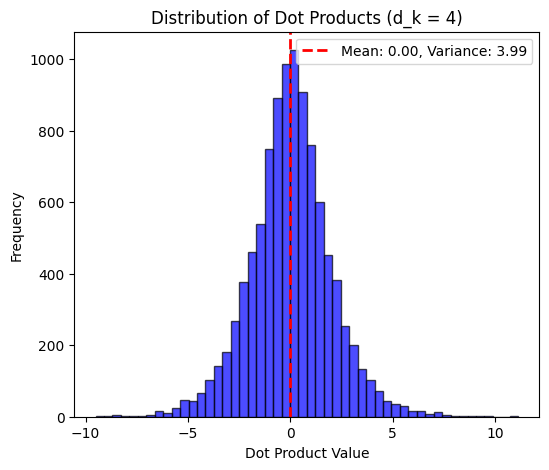

Mean 0.004186089082440096
Variance 3.99389639416845


In [ ]:
# নিচের কোডটি এমন একটি কোড যা আপনি শুধু চালিয়ে ১০,০০০ বার প্রদর্শন করতে পারবেন, তাই আপনি এটি বাদ দিতে পারেন।
# যেসব ফাংশন র‍্যান্ডম ভেক্টর তৈরি করে (মধ্যম 0 ও বৈচিত্র্য 1 সহ স্ট্যান্ডার্ড নর্মাল ডিস্ট্রিবিউশন)
import numpy as np
import matplotlib.pyplot as plt

def generate_random_vectors(dim, num_samples=10000):
    return np.random.randn(num_samples, dim)

# অভ্যন্তরীণ গুণফল হিসাব করার ফাংশনসমূহ
def compute_dot_products(vectors1, vectors2):
    return np.sum(vectors1 * vectors2, axis=1)

# ৪-মাত্রিক ভেক্টর তৈরি করুন
dim_4 = 4

# নমুনার সংখ্যা (পরিসংখ্যানগতভাবে স্থিতিশীল হতে ১০,০০০)
num_samples = 10000

# সাদৃশ্যপূর্ণ ভেক্টর তৈরি করুন
torch.manual_seed(1337)
vectors_4d_A = generate_random_vectors(dim_4, num_samples)
vectors_4d_B = generate_random_vectors(dim_4, num_samples)

# অভ্যন্তরীণ গুণফল গণনা করুন
dot_products_4d = compute_dot_products(vectors_4d_A, vectors_4d_B)

# গড় এবং বৈচিত্র্য হিসাব করুন
mean_4d = np.mean(dot_products_4d)
var_4d = np.var(dot_products_4d)

# একটি হিস্টোগ্রাম তৈরি করুন (শুধুমাত্র ৪-ডাইমেনশনাল ভেক্টর)
plt.figure(figsize=(6, 5))
plt.hist(dot_products_4d, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_4d, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_4d:.2f}, Variance: {var_4d:.2f}")
plt.title("Distribution of Dot Products (d_k = 4)")
plt.xlabel("Dot Product Value")
plt.ylabel("Frequency")
plt.legend()

# গ্রাফ দেখুন
plt.show()

# গণনার ফলাফল প্রদর্শন করুন
mean_4d, var_4d

# গ্রাফ দেখুন
plt.show()

# হিসাবের ফলাফল দেখান
print("গড়", mean_4d)
print("বিচ্যুতি", var_4d)

**পরবর্তী ধাপে, দুইটি ৬৪-মাত্রিক ভেক্টরের ডট প্রডাক্ট হিসাব করে দেখুন।**

In [ ]:
torch.manual_seed(1337)
dim64_query = torch.randn(64) # TODO: র‍্যান্ডম 64D ভেক্টর (গড় 0, মানদণ্ড 1)
dim64_key = torch.randn(64) # TODO: যাদৃচ্ছিক 64D ভেক্টর (গড় 0, স্ট্যান্ডার্ড ডেভিয়েশন 1)

print_formatted_tensor(dim64_query)
print_formatted_tensor(dim64_key)

Tensor Size: [64]
tensor([
         0.18,  -0.07,  -0.36,  -0.92,   0.63,   0.03,   0.95,   0.06,   0.36,   1.17,  -1.35,  -0.51,   0.24,  -0.24,  -0.92,   1.54,   1.35,  -0.14,   0.29,   0.97,  -2.04,   0.49,   1.49,   0.59,   0.13,  -1.56,  -1.16,  -0.33,   0.45,  -0.80,   1.52,   2.51,  -0.66,  -0.25,   1.01,   0.12,   0.16,   1.13,  -1.15,  -0.30,  -0.51,  -0.92,   0.55,  -1.49,  -1.21,   0.57,  -0.60,  -0.69,   1.65,  -0.80,   1.35,  -0.28,  -1.51,   2.10,   2.76,  -1.75,   1.45,  -1.51,   0.82,  -0.21,   0.78,   1.53,   1.61,  -0.40
       ])
Tensor Size: [64]
tensor([
         -0.83,   0.60,  -0.05,  -0.06,  -0.50,   0.47,  -0.26,  -1.07,   2.01,  -0.54,   0.22,   0.70,  -1.43,   0.91,   0.14,   0.23,   2.49,  -1.22,   1.01,   0.56,  -1.59,  -1.27,   0.69,  -0.20,   0.34,  -0.34,   0.48,  -0.77,  -0.42,  -0.44,  -1.00,  -0.41,  -1.67,  -1.37,  -0.17,   0.96,   0.03,  -0.74,  -0.30,   0.02,  -0.18,  -0.13,   0.29,   1.38,   0.12,   2.54,  -0.64,  -1.97,  -0.33,   0.01,   0.93,  -

In [ ]:
dot_products_64d = dim64_query @ dim64_key # TODO: dim64_query এবং dim64_key এর অভ্যন্তরীণ গুণফল
print("ডট_প্রোডাক্ট_৬৪ডি", dot_products_64d)

dot_products_64d tensor(4.6456)


আরে, এটা যেন 4D ক্ষেত্রে থেকে একটু বড়।

অন্য seed দিয়ে চেষ্টা করে দেখো।

In [ ]:
torch.manual_seed(57)
dim64_query = torch.randn(64)
dim64_key = torch.randn(64)
dot_products_64d = dim64_query @ dim64_key
print("ডট_প্রোডাক্টস_64ডি", dot_products_64d)

dot_products_64d tensor(-5.8505)


হায়, এটা কি যেন ৪D কেসের চেয়ে ছোট।

৬৪-ডাইমেনশনাল ভেক্টরগুলোর ডট প্রোডাক্টের একটা উপাদান হিসাব করতে ৬৪টা মান যোগ করতে হয়,

সুতরাং এটা ৪-ডাইমেনশনাল কেসের থেকে অনেক বড় বা ছোট হতে পারে।

64 মাত্রার জন্য 10,000 বার চেষ্টা করে তার বণ্টন দেখান।

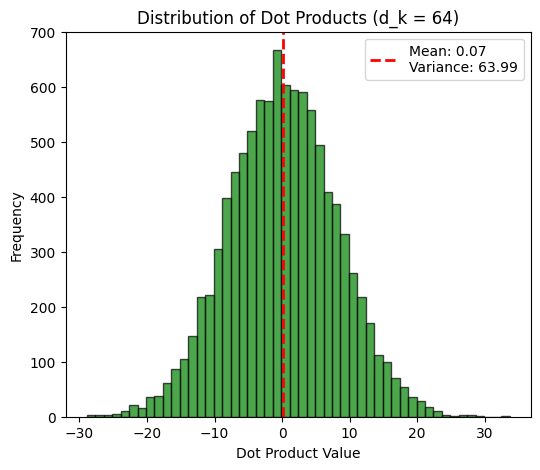

mean 0.0673210560412091
variance 63.985536293093475


In [ ]:
# ৬৪-মাত্রার ভেক্টর তৈরি করুন
dim_64 = 64

# নমুনার সংখ্যা (পরিসংখ্যানগতভাবে স্থিতিশীল হতে ১০,০০০)
num_samples = 10000

# র্যান্ডম ভেক্টর তৈরি করুন
torch.manual_seed(1337)
vectors_64d_A = generate_random_vectors(dim_64, num_samples)
vecotors_64d_B = generate_random_vectors(dim_64, num_samples)

# অভ্যন্তরীণ গুণফল হিসাব করুন
dot_products_64d = compute_dot_products(vectors_64d_A, vecotors_64d_B)

# গড় এবং বৈচিত্র্য হিসাব করুন
mean_64d = np.mean(dot_products_64d)
var_64d = np.var(dot_products_64d)

# 64-মাত্রিক ভেক্টরগুলোর জন্য একটি হিস্টোগ্রাম তৈরি করুন
plt.figure(figsize=(6, 5))
plt.hist(dot_products_64d, bins=50, alpha=0.7, color='green', edgecolor='black')
plt.axvline(mean_64d, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_64d:.2f}\nVariance: {var_64d:.2f}")
plt.title("Distribution of Dot Products (d_k = 64)")
plt.xlabel("Dot Product Value")
plt.ylabel("Frequency")
plt.legend()

# গ্রাফ দেখুন
plt.show()

# হিসাবের ফলাফল দেখান
print("গড়", mean_64d)
print("বিচ্যুতি", var_64d)

চলুন ৭৬৮ ডাইমেনশনে চেষ্টা করি।  
৭৬৮ ডাইমেনশন হলো ChatGPT2-small-এর এমবেডিং সাইজ।

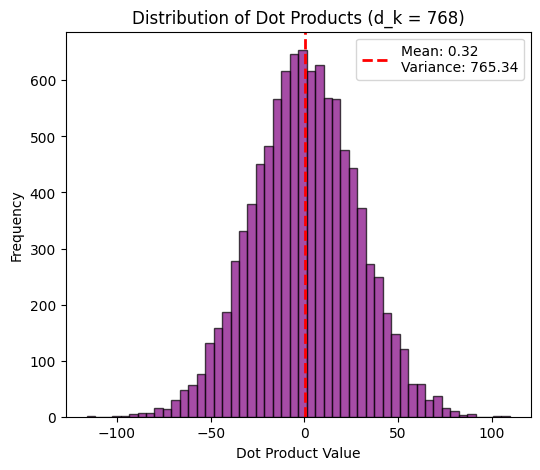

mean: 0.31858283261968806
variance: 765.3418121194239


In [ ]:
# ৭৬৮-মাত্রিক ভেক্টর তৈরি করুন
dim_768 = 768

# নমুনার সংখ্যা (পরিসংখ্যানগতভাবে স্থিতিশীল হতে ১০,০০০)
num_samples = 10000

# র্যান্ডম ভেক্টর তৈরি করুন
torch.manual_seed(1337)
vectors_768d_A = generate_random_vectors(dim_768, num_samples)
vectors_768d_B = generate_random_vectors(dim_768, num_samples)


# অভ্যন্তরীণ গুণফল গণনা করুন
dot_products_768d = compute_dot_products(vectors_768d_A, vectors_768d_B)

# গড় এবং বৈচিত্র্য গণনা করুন
mean_768d = np.mean(dot_products_768d)
var_768d = np.var(dot_products_768d)

# একটি হিস্টোগ্রাম তৈরি করুন (শুধুমাত্র ৭৬৮-মাত্রিক ভেক্টর)
plt.figure(figsize=(6, 5))
plt.hist(dot_products_768d, bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(mean_768d, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_768d:.2f}\nVariance: {var_768d:.2f}")
plt.title("Distribution of Dot Products (d_k = 768)")
plt.xlabel("Dot Product Value")
plt.ylabel("Frequency")
plt.legend()

# গ্রাফ দেখুন
plt.show()

# হিসাবের ফলাফল দেখান
print("গড়:", mean_768d)
print("বৈচিত্র্য:", var_768d)

যদি query এবং key ভেক্টর $d$-মাত্রার হয়,

এবং প্রতিটি উপাদান একটি স্ট্যান্ডার্ড নরমাল ডিস্ট্রিবিউশন থেকে নেওয়া হয়,

তাহলে তাদের ডট প্রোডাক্টের variance কত হবে?

শুধুমাত্র সঠিক উত্তরগুলো রাখুন, বাকিগুলো মুছে ফেলুন। (সম্পাদনার জন্য ডবল ক্লিক করুন!)

Variance: ①0.5d / ②d / ③2d # TODO

ডট প্রোডাক্টের ভ্যারিয়েন্স বাড়ে যখন এমবেডিং ডাইমেনশন $d_k$ বড় হয়।

ডট প্রোডাক্টের ভ্যারিয়েন্স প্রায় $d_k$ গুণ বেড়ে যায়।

কারণ ডট প্রোডাক্টে $d_k$ টার্ম যোগ হয়, তাই এটা পুরোপুরি স্বাভাবিক।

#### **ভ্যারিয়েন্স বাড়লে কী হয়**
যখন ভ্যারিয়েন্স বাড়ে, **ডট প্রোডাক্টের ডিস্ট্রিবিউশন সমতল হয়ে যায় এবং চরম মানগুলো বেশি আসে।**

চরম মান বেশি আসতে থাকলে, softmax ঝুঁকিপূর্ণ হয়ে পড়ে।

এটা বড় মানগুলোকে আরও বড় বানায়, তাই একটাই মান সব নজর কাড়ে।

> *NOTE: এটা একবারে বুঝতে না পারলে চিন্তা নেই — শীঘ্রই সব পরিষ্কার হবে।*

---

### সমাধান: $$\sqrt{d_k}$$ দিয়ে ভাগ করা

---

ডট প্রোডাক্ট থেকে শুরু করি $q \cdot k$ যেখানে $Var(q \cdot k) \approx d_k$,

<br>

$$
Var\!\Bigl(\frac{q \cdot k}{\sqrt{d_k}}\Bigr) = \frac{Var(q \cdot k)}{d_k} \approx \frac{d_k}{d_k} = 1
$$

অর্থাৎ, **স্কেলিং করার পর ভ্যারিয়েন্স প্রায় ১ থাকে, $d_k$ যাই হোক না কেন**, যার ফলে পরিস্থিতি স্থির থাকে ও বড় ওঠানামা হয় না।

### **৬৪ ডাইমেনশনের ডেটা দিয়ে পরীক্ষা করুন**

স্কেলিং করার আগে এবং $$\sqrt{d_k}$$ দিয়ে ভাগ করার পরে ডিস্ট্রিবিউশন তুলনা করতে নিচের কোড রান করুন।

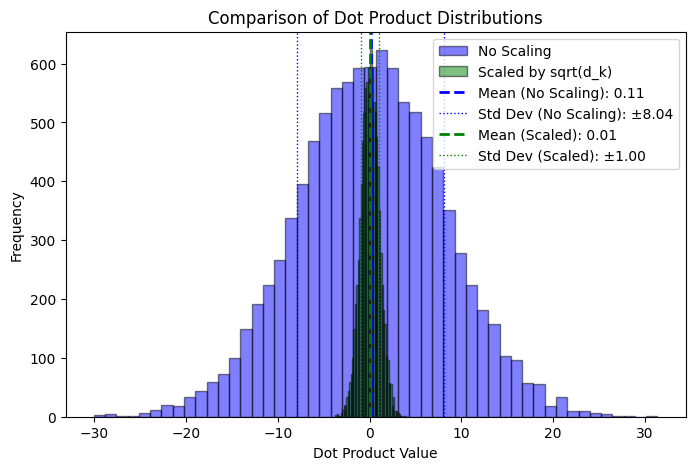

In [ ]:
# এটি ডিস্ট্রিবিউশন দেখানোর কোড, তাই আপনি এটি স্কিপ করতে পারেন।
import numpy as np
import matplotlib.pyplot as plt

# র‍্যান্ডম ৬৪-মাত্রিক ভেক্টর তৈরি করুন (স্ট্যান্ডার্ড নরমাল ডিস্ট্রিবিউশন)
num_samples = 10000
dim_64 = 64

torch.manual_seed(1337)
vectors_64d_A = np.random.randn(num_samples, dim_64)
vectors_64d_B = np.random.randn(num_samples, dim_64)

# অভ্যন্তরীণ গুণফল হিসাব করুন
dot_products_64d = np.sum(vectors_64d_A * vectors_64d_B, axis=1)

# স্কেলিং প্রয়োগ করুন (√d_k দিয়ে ভাগ করুন)
dot_products_64d_scaled = dot_products_64d / np.sqrt(dim_64)

# হিস্টোগ্রামগুলো এক ছবিতে ওভারলে করা হয়েছে
plt.figure(figsize=(8, 5))

# হিস্টোগ্রাম (স্কেলিং নেই)
plt.hist(dot_products_64d, bins=50, alpha=0.5, color='blue', edgecolor='black', label="No Scaling")

# হিস্টোগ্রাম (√d_k দ্বারা ভাগ করার পরে)
plt.hist(dot_products_64d_scaled, bins=50, alpha=0.5, color='green', edgecolor='black', label="Scaled by sqrt(d_k)")

# গড় এবং বৈচিত্র্য রেখা (স্কেলিং নেই)
mean_64d = np.mean(dot_products_64d)
var_64d = np.var(dot_products_64d)
plt.axvline(mean_64d, color='blue', linestyle='dashed', linewidth=2, label=f"Mean (No Scaling): {mean_64d:.2f}")
plt.axvline(mean_64d + np.sqrt(var_64d), color='blue', linestyle='dotted', linewidth=1, label=f"Std Dev (No Scaling): ±{np.sqrt(var_64d):.2f}")
plt.axvline(mean_64d - np.sqrt(var_64d), color='blue', linestyle='dotted', linewidth=1)

# গড় এবং বৈচিত্র্য রেখা (√d_k দ্বারা ভাগ করার পর)
mean_64d_scaled = np.mean(dot_products_64d_scaled)
var_64d_scaled = np.var(dot_products_64d_scaled)
plt.axvline(mean_64d_scaled, color='green', linestyle='dashed', linewidth=2, label=f"Mean (Scaled): {mean_64d_scaled:.2f}")
plt.axvline(mean_64d_scaled + np.sqrt(var_64d_scaled), color='green', linestyle='dotted', linewidth=1, label=f"Std Dev (Scaled): ±{np.sqrt(var_64d_scaled):.2f}")
plt.axvline(mean_64d_scaled - np.sqrt(var_64d_scaled), color='green', linestyle='dotted', linewidth=1)

# গ্রাফ সেটিংস
plt.title("Comparison of Dot Product Distributions")
plt.xlabel("Dot Product Value")
plt.ylabel("Frequency")
plt.legend()

# গ্রাফ দেখুন
plt.show()

স্কেলিং ভ্যারিয়েন্স কমিয়েছে, ফলে এটা আরও সুসংগঠিত হয়েছে।

$$
{AttentionWeights}(Q, K, V) = \frac{Q K^T}{\sqrt{d_k}}
$$

এখানে, ${AttentionWeights}$ হলো কুয়েরি ($Q$) ও কিরি ($K$) এর গুণফলকে $d_k$ এর বর্গমূল দিয়ে ভাগ করার মাধ্যমে পাওয়া ওজনগুলোর ম্যাট্রিক্স। $d_k$ হল $K$ ভেক্টরের ডাইমেনশন সংখ্যা। এই ভাগ করে নেওয়া হয় যাতে স্কেলের কারণে বিশাল সংখ্যা তৈরি না হয়ে সফটম্যাক্সে সমস্যা না হয়।

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np

# কোয়েরি, ভ্যালু, কী সংজ্ঞা
Query = Value = Key = torch.tensor([[1., 0., 2.],
                                    [2., 0., 1.],
                                    [2., 1., 0.]])
dk = 3

# অ্যাটেনশন হিসাব করা হচ্ছে
# সাধারণত ভাগ ব্যবহার করা হয় না, তাই আমরা গুণের রূপ ব্যবহার করব।
AttentionWeights = (Query @ Key.T) * dk ** (-0.5) # TODO: উপরের সূত্রটি লিখুন। dk**(-0.5) ব্যবহার করুন।
print_formatted_tensor(AttentionWeights)

Tensor Size: [3, 3]
tensor([
         [  2.89,   2.31,   1.15],
         [  2.31,   2.89,   2.31],
         [  1.15,   2.31,   2.89]
       ])


**`Check Point`** <label><input type="checkbox"> ← যদি উপরের ফলাফলের সাথে নিচের উত্তর মিলে যায় তাহলে এই বক্সে টিক দিন<label>

```
Tensor Size: [3, 3]
tensor([
         [  2.89,   2.31,   1.15],
         [  2.31,   2.89,   2.31],
         [  1.15,   2.31,   2.89]
       ])
```

$$
{AttentionOutput}(Q, K, V) = \left(\frac{Q K^T}{\sqrt{d_k}}\right) V
$$

In [ ]:
# মনোযোগ গণনা হচ্ছে
AttentionOutput = AttentionWeights @ Value # TODO: উপরে দেওয়া সূত্রটি বাস্তবায়ন করুন।

# ফলাফল দেখুন
print_formatted_tensor(AttentionOutput)

Tensor Size: [3, 3]
tensor([
         [  9.81,   1.15,   8.08],
         [ 12.70,   2.31,   7.51],
         [ 11.55,   2.89,   4.62]
       ])


✅ **যখন dot product এর variance অনেক বড় হয়ে যায়, তখন distribution সমান হয়ে যায় আর চরম মান বেড়ে যায়।**<br>
✅ **$d_k$ এর বর্গমূল দ্বারা ভাগ করলে variance সবসময় 1 থাকে, dimension যতই বড় হোক না কেন!**<br>
✅ **এতে attention এর হিসাব স্থায়ী হয় এবং সেগুলো ভালো কাজ করে।**<br>

এই স্কেলিং-এর জন্যই **Transformers যেকোন dimension size এ মসৃণভাবে চলে।**

**Chapter 6: Section 4: Problem ① Dimension Scaling** <label><input type="checkbox"> Mark as Done</label>

### Section 4: Problem ② Normalization


#### **Normalization-এর ধারণা**  
#### **কিভাবে I-এর দৃষ্টিকোণ থেকে Embedding ভেক্টর পেতে হয়**

অতীত সেকশনের উদাহরণ দিয়ে বোঝানো যাক।  
I-এর দৃষ্টিকোণ থেকে embedding ভেক্টর পেতে হলে,  
**প্রতিটি শব্দের embedding ভেক্টরকে সঠিক ওজন দিয়ে মেশাতে হবে।**  
চলুন সবচেয়ে সহজ পদ্ধতিই শুরু করি।

### **1. Normalization ছাড়া প্রথমে যোগ করা**  
উদাহরণস্বরূপ, query `I`-এর জন্য keys এর সাথে inner product থেকে স্কোরগুলো হল:

$$
w_1 = 5, \quad w_2 = 4, \quad w_3 = 2
$$

<br>  
যদি এগুলোকে ওজন হিসেবে যেমন আছে তেমন ব্যবহার করি, তাহলে গণনা এরকম হবে:  
<br>  
<br>  

$$
\text{I-এর দৃষ্টিকোণ থেকে Embedding ভেক্টর} = w_1 * value_{I} + w_2 * value_{\text{love}} + w_3 * value_{\text{you}} \\
= 5 \times [1,0,2] + 4 \times [2,0,1] + 2 \times [2,1,0] \\
= [17, 2, 14]
$$  

<br>  

কিন্তু, **এটা শুধু যোগ করা হয়েছে, সঠিকভাবে মেশানো হয়নি।**  
[17, 2, 14] তিনটি আসল ভেক্টরের থেকে অনেক আলাদা।  
<br>  
<br>  

---

### **2. সবচেয়ে সহজ Normalization**  
কিভাবে $w_1, w_2, w_3$ এর যোগফল1 করে embedding গুলো সঠিকভাবে মেশানো যায়?

অর্থাৎ, সব ওজনকে এর দ্বারা গুণ করা: 

$$
\frac{1}{w_1 + w_2 + w_3}
$$  
<br>  

#### **স্পষ্ট উদাহরণ**

$$
w_1 + w_2 + w_3 = 5 + 4 + 2 = 11
$$  

Normalization করার পর ওজনগুলো হয়ে গেল:

$$
\tilde{w}_1 = \frac{5}{11} = 0.45, \quad \tilde{w}_2 = \frac{4}{11} = 0.36, \quad \tilde{w}_3 = \frac{2}{11} = 0.18
$$  

তাই value1 ৪৫%, value2 ৩৬%, আর value3 ১৮% মিশবে।

<br>  

এগুলো ব্যবহার করে নতুন embedding ভেক্টর হলো:

$$
\left( \frac{5}{11} \times [1,0,2] \right) + \left( \frac{4}{11} \times [2,0,1] \right) + \left( \frac{2}{11} \times [2,1,0] \right) \\
= [1.5, 0.18, 1.27]
$$  
<br>  

এভাবেই, **মূল embeddings-এর স্কেল খুব বেশি না ফাটিয়ে, সঠিকভাবে মেশানো সম্ভব!**

---

#### **Softmax Normalization**  
সরল নর্মালাইজেশনের একটা সমস্যা আছে: স্কোরের মধ্যে পার্থক্য স্পষ্ট হয় না। তাই Softmax normalization এক্সপোনেনশিয়াল ব্যবহার করে।

---

## **3. Using Softmax Normalization**  
Softmax ফাংশনের সূত্র:

$$
{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
$$  

Softmaxের সবচেয়ে বড় সুবিধা হলো এটি এক্সপোনেনশিয়াল ব্যবহার করে। এটা বড় ও ছোট স্কোরের ফারাক আরও স্পষ্ট করে। স্পষ্ট ওজন দেয়, যেটা মডেলকে সবচেয়ে গুরুত্বপূর্ণ অংশগুলোতে ফোকাস করতে সাহায্য করে। এজন্য এটাকে `Soft` (মসৃণ) `Max` ফাংশন বলা হয়।

---

## **4. A Concrete Example Applying Softmax**  

| Word | Original Score | Softmax Applied \( k \) |
|-------|---------------|------------------------|
| I     | 5             | $ \ e^5 / (e^5 + e^4 + e^2) \ $ |
| love  | 4             | $ \ e^4 / (e^5 + e^4 + e^2) \ $ |
| you   | 2             | $ \ e^2 / (e^5 + e^4 + e^2) \ $ |

গণনাটা করলে পাই:  

$$
w_1 = e^5 / (e^5 + e^4 + e^2) = 0.705, \quad w_2 = e^4 / (e^5 + e^4 + e^2) = 0.259, \quad w_3 = e^2 / (e^5 + e^4 + e^2) = 0.035
$$

<br><br>  
তুলনার জন্য, সরল নর্মালাইজেশনের ফলাফলগুলো এখানে:

$$
\tilde{w}_1 = \frac{5}{11} = 0.45, \quad \tilde{w}_2 = \frac{4}{11} = 0.36, \quad \tilde{w}_3 = \frac{2}{11} = 0.18
$$
  
<br><br>  
সরল নর্মালাইজেশনের চেয়ে Softmax এক্সপোনেনশিয়াল ব্যবহার করে বড়-ছোট স্কোরের ফারাক আরো ফুটিয়ে তোলে। ফলে ওজনগুলো অনেক বেশি স্পষ্ট হয়!  
<br><br>  
এই ওজনগুলো দিয়ে embedding ভেক্টর হিসেব করলে:  

$$
(0.705 \times [1,0,2]) + (0.259 \times [2,0,1]) + (0.035 \times [2,1,0]) \\
= [1.29, 0.04, 1.67]
$$  

এটাই **“‘I’ শব্দের দৃষ্টিকোণ থেকে নতুন embedding ভেক্টর”**!

**Summary**

$$
{AttentionWeights}(Q, K, V) = {softmax}\left(\frac{Q K^T}{\sqrt{d_k}}\right)
$$

$$
Q: \text{Query matrix}, \
K: \text{Key matrix}, \
d_k: \text{Dimension of the key matrix}
$$


এই সূত্রটি Query ম্যাট্রিক্স ${Q}$ এবং Key ম্যাট্রিক্সের ট্রান্সপোজ ${K^T}$ এর গুণাফল হিসাব করে,


এরপর, Key ডাইমেনশন ${d_k}$ এর বর্গমূল দ্বারা ভাগ করে ফলাফলকে স্কেল করে দেয়।

সবশেষে, ওজনগুলোকে স্বাভাবিক করতে softmax ফাংশন প্রয়োগ করে।

attention weights দেখায় প্রতিটি মান (word) নতুন রূপায়ণে কতটা অবদান রাখবে।

অর্থাৎ, প্রতিটি শব্দ থেকে তথ্য নেওয়ার মিশ্রণের অনুপাত প্রকাশ করে,

যখন তারা query এর সাথে কতটা সম্পর্কিত তা বিবেচনা করা হয়।


> **Terminology Note:**
> এই এক্সপেরিমেন্টে, আমরা attention weights শব্দটি ব্যবহার করি softmax এর আগে value গুলোর জন্য (যাকে অন্যত্র attention scores বলা হয়) এবং softmax এর পরে normalized মানগুলোর জন্য, যতক্ষণ না অন্যথা বলা হয়। সহজতার জন্য এবং ব্যাখ্যা একরকম রাখার লক্ষ্যে আমরা এভাবেই করি।

```python
Function: F.softmax
Arguments: AttentionWeights, dim=1
```
`dim=1` সেট করলে প্রতিটি সারিতে Softmax স্বাভাবিকীকরণ প্রয়োগ হয়।

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np

# কুয়েরি, ভ্যালু, কী সংজ্ঞা
Query = Value = Key = torch.tensor([[1., 0., 2.], [2., 0., 1.], [2., 1., 0.]])
dk = 3

# অ্যাটেনশন ওজন গণনা করা হচ্ছে
AttentionWeights = (Query @ Key.T) * dk **(-0.5)
print_formatted_tensor("softmax এর আগে AttentionWeights", AttentionWeights)

AttentionWeights= F.softmax(AttentionWeights, dim=1) # TODO: F.softmax ফাংশন ব্যবহার করুন।
print_formatted_tensor("softmax এর পর AttentionWeights", AttentionWeights)

AttentionWeights before softmax
Tensor Size: [3, 3]
tensor([
         [  2.89,   2.31,   1.15],
         [  2.31,   2.89,   2.31],
         [  1.15,   2.31,   2.89]
       ])
AttentionWeights after softmax
Tensor Size: [3, 3]
tensor([
         [  0.58,   0.32,   0.10],
         [  0.26,   0.47,   0.26],
         [  0.10,   0.32,   0.58]
       ])


$$
{AttentionOutput}(Q, K, V) = {softmax}\left(\frac{Q K^T}{\sqrt{d_k}}\right) V
$$

In [ ]:
AttentionOutput = AttentionWeights @ Value
print_formatted_tensor("মনোযোগ আউটপুট", AttentionOutput)

AttentionOutput
Tensor Size: [3, 3]
tensor([
         [  1.42,   0.10,   1.47],
         [  1.74,   0.26,   1.00],
         [  1.90,   0.58,   0.53]
       ])


**Chapter 6: Section 4: Problem ② softmax (Normalization)** <label><input type="checkbox"> Mark as Done</label>

### Section 5: Problem ③ Mask


#### **প্রতারণা রোধ করা**

তৃতীয় সমস্যা হলো ভুলবশত এমন তথ্য ব্যবহারের চেষ্টা করা যেটা ব্যবহার করা উচিত নয়।  
বিশেষ করে, **ভবিষ্যতের শব্দ মিশ্রিত হলে ভুল মনযোগ হয়!** 🚨  

<br>
<br>

---

### **1. কেন ভবিষ্যতের শব্দ রেফারেন্স করা যাবে না?**  

উদাহরণস্বরূপ, নিচের মত একটা attention weight হিসেব করা হয়েছে ভাবুন:  
<br>
<br>

$$
{AttentionWeights}=
\begin{bmatrix}
0.58 & 0.32 & 0.10 \ \\
0.26 & 0.47 & 0.26 \ \\
0.10 & 0.32 & 0.58 \
\end{bmatrix}
$$

<br>
<br>

এই ম্যাট্রিক্সের **প্রথম সারি, দ্বিতীয় কলাম (0.32)** দিকে লক্ষ্য করুন।  

এটা দেখাচ্ছে "I" (বিষয়বস্তুর দৃষ্টিকোণ থেকে) যখন মনোযোগ দিচ্ছে তখন "love"-এর গুরুত্ব কেমন।  

<br>
<br>
কিন্তু একটু ভেবে দেখুন।  

যদি বাক্যটি শব্দে শব্দে তৈরি হয়, "I" শব্দের সময় আপনি **“love” বা “you” তখন পর্যন্ত জানেন না!**  

তাই, ভবিষ্যতের শব্দগুলো নিয়ে attention weight ব্যবহার করা prediction মডেলে এমন একটা **চিট কোডের মত যা ভবিষ্যতের তথ্য গুপ্তভাবে ঢুকিয়ে দেয়।**  

সংক্ষেপে, "I" এর সময় attention এ "love" বা "you" সম্পর্কে তথ্য থাকা চলবে না।  

<br>
<br>

---

<br>

### **2. ভবিষ্যতের শব্দ ব্লক করার কৌশল কী?**  

একটি সহজ উপায় হলো **ভবিষ্যতের সব শব্দের ওজন 0 করে দেওয়া।**  

কিন্তু আরও ভালো উপায় হলো **Softmax প্রয়োগের আগে ভবিষ্যতের শব্দগুলোর ওজনকে ঋণাত্মক অসীম (-inf) সেট করা।**  

<br>
<br>

#### **কেন -inf ব্যবহার করবেন?**  
Softmax ফাংশন ইনপুটগুলোকে $e^x$-এ রূপান্তর করে এবং সব আউটপুটের যোগফল ১ হয় এমনভাবে নিয়ন্ত্রণ করে।  

<br>
<br>

- বড় মান → $e^x$ বড় হয়, তাই Softmax আউটপুটও বড় হয়  
- ছোট মান → $e^x$ ছোট হয়, Softmax আউটপুটও ছোট হয়  
- -inf মান → $e^{-\infty} = 0$, Softmax আউটপুট ০ হয়  

<br>
<br>

এখানে, ভবিষ্যতের শব্দগুলোর স্কোর -inf রাখলে তাদের Softmax আউটপুট **শূন্য** হয়, ফলে ভবিষ্যতের শব্দগুলোকে মনোযোগ থেকে পুরোপুরি বাদ দেয়া হয়।

অন্যদিকে, ওজন 0 দিলে Softmax এ $e^0 = 1$ হয়, ফলে ফলাফল হয় সীমাবদ্ধ মান $1 / \sum e^{j}$, যা ভুল।  

<br>
<br>

---

### **3. আসলে এটা কীভাবে করে**  
ভবিষ্যতের শব্দগুলোকে লুকানো হয় **“Masked Attention”** নামে পরিচিত পদ্ধতিতে।  

বিশেষভাবে, একটি মাস্ক ম্যাট্রিক্স ব্যবহার করা হয় যেখানে **ত্রিভুজাকার ম্যাট্রিক্সের অপরদিকে উপরের সব পজিশন -inf সেট করা থাকে।**  

ফলস্বরূপ ভবিষ্যতের শব্দের প্রভাব শেষ হয়ে যায়।  

<br>
<br>

এই পদ্ধতিতে,  
✅ **ভবিষ্যতের শব্দ না দেখেই সঠিক attention পাওয়া যায়!**<br>
✅ **ভাষার মডেলগুলো সৎভাবে শব্দ তৈরি করে, কোনও চিট ছাড়াই!**

$$
{AttentionWeights}(Q, K, V) = \frac{Q K^T}{\sqrt{d_k}}
$$

এখানে, $Q$ হলো *query* মেট্রিক্স, $K$ হলো *key* মেট্রিক্স এবং $V$ হলো *value* মেট্রিক্স। \\
ক্যামেল কেস $d_k$ হলো $K$ এর ভেক্টরের মাত্রার স্কয়ার রুট, যা ম্যাট্রিক্স গুণফলকে স্কেল বা নিয়ন্ত্রণ করে। \\
এই সূত্রটা মূলত $Q$ এবং $K$ এর মধ্যকার সম্পর্ক বা সাদৃশ্য নিরূপণ করে, যাতে বেশি মিল থাকা অংশগুলো বেশি ওজন পায়।

In [ ]:
# সেকশন ২ এর সমস্যার একই কোড
import torch
import torch.nn.functional as F
import numpy as np

# কুয়েরি, ভ্যালু, কী সংজ্ঞা
Query = Value = Key = torch.tensor([[1., 0., 2.],
                                    [2., 0., 1.],
                                    [2., 1., 0.]])
dk = 3

# মনোযোগ গণনা করছেন
AttentionWeights = (Query @ Key.T) * dk **(-0.5)
print_formatted_tensor(AttentionWeights)

Tensor Size: [3, 3]
tensor([
         [  2.89,   2.31,   1.15],
         [  2.31,   2.89,   2.31],
         [  1.15,   2.31,   2.89]
       ])


```python
Function: torch.triu
Arguments: torch.ones(3, 3), diagonal=1
```
- `torch.ones(3, 3)` ৩x৩ আকারের একটি ম্যাট্রিক্স তৈরি করে যা সব জায়গায় একসাথে ভরা।
- `torch.triu(..., diagonal=1)` মাত্র মূল ডায়াগোনালের উপরের ত্রিভুজ অংশটুকুই এক হিসেবে রাখে।<br>মূল ডায়াগোনাল এবং তার নিচের অংশগুলো শূন্যে পরিণত হয়।


In [ ]:
mask = torch.triu(torch.ones(3, 3), diagonal=1) # TODO: একটি উপরের ত্রিভুজাকার ম্যাট্রিক্স তৈরি করুন
print(mask)

tensor([[0., 1., 1.],
        [0., 0., 1.],
        [0., 0., 0.]])


উপরের কথাগুলো শুধুমাত্র সেই জায়গাগুলো দেখাচ্ছে যেখানে mask প্রযোজ্য হবে।

১ মানে “mask প্রযোজ্য হবে,” আর ০ মানে “mask প্রযোজ্য হবে না।”

বাস্তব mask করার কাজ নিচে করা হবে। সঙ্গে থাকুন!

```python
Instance: AttentionWeights
Method: masked_fill
Arguments: mask == 1, float('-inf')
```

মাস্ক করা স্থানে -inf বসিয়ে, এরা অ্যাটেনশনের আউটপুটে কিছুই যোগ না করার নিশ্চয়তা দেয়।

- `mask == 1` দিয়ে `mask` ম্যাট্রিক্সের সেই জায়গাগুলো খুঁজে বের করে যেখানে উপাদান `1` আছে, যেগুলো মাস্ক এলাকা হিসেবে সেট করা হবে।<br>
- `float('-inf')` দিয়ে সেই জায়গাগুলোকে ঋণাত্মক অসীম দিয়ে রিপ্লেস করা হয়।

In [ ]:
masked_attention_weights = AttentionWeights.masked_fill(mask == 1, float('-inf')) # TODO: Attention এর নির্দিষ্ট উপাদানকে -∞ এ পরিবর্তন করুন
print_formatted_tensor(masked_attention_weights)

Tensor Size: [3, 3]
tensor([
         [  2.89,   -inf,   -inf],
         [  2.31,   2.89,   -inf],
         [  1.15,   2.31,   2.89]
       ])


softmax ফাংশন প্রয়োগ করুন

In [ ]:
masked_attention_weights = F.softmax(masked_attention_weights, dim=1)
print_formatted_tensor("softmax এর পর masked_attention_weights", masked_attention_weights)

masked_attention_weights after softmax
Tensor Size: [3, 3]
tensor([
         [  1.00,   0.00,   0.00],
         [  0.36,   0.64,   0.00],
         [  0.10,   0.32,   0.58]
       ])


মাস্ক করা attention এবং value ম্যাট্রিক্সের ডট প্রোডাক্ট নিয়ে, ক্যোয়ের জন্য একটি সঠিক মিশ্র ভেক্টর পাওয়া যাবে।

In [ ]:
masked_attention_output = masked_attention_weights @ Value # TODO: মাস্ক অ্যাটেনশন ও ভ্যালু ম্যাট্রিক্সের অভ্যন্তরীণ গুণফল
print_formatted_tensor("মাস্ক করা_attention_output", masked_attention_output)

masked_attention_output
Tensor Size: [3, 3]
tensor([
         [  1.00,   0.00,   2.00],
         [  1.64,   0.00,   1.36],
         [  1.90,   0.58,   0.53]
       ])


**Chapter 6: Section 5: Problem ③ Masking** <label><input type="checkbox"> Mark as Done</label>

### Section 6: Problem ④ Dropout

**হিসাবের ফলাফল পরীক্ষা করুন**

গত অধ্যায় থেকে মাস্ক করা attention-এর ফলাফল অনুসারে (softmax এর মাধ্যমে প্রক্রিয়াজাতের পর)

$
{AttentionWeights}=
\begin{bmatrix}
1.00 & 0.00 & 0.00 \ \\
0.36 & 0.64 & 0.00 \ \\
0.10 & 0.32 & 0.58 \
\end{bmatrix}
$
<br>

Query **"I"**-এর দৃষ্টিকোণ থেকে মিক্সড ভেক্টর

$$
\begin{align*}
&= 1.00 \times [1,\ 0,\ 2] \\
&+ \ 0.00 \times [2,\ 0,\ 1] \\
&+ \ 0.00 \times [2,\ 1,\ 0] \\
&= [1.00,\ 0.00,\ 2.00]
\end{align*}
$$


Query **"love"**-এর দৃষ্টিকোণ থেকে মিক্সড ভেক্টর

$$
\begin{align*}
&= 0.36 \times [1,\ 0,\ 2] \\
&+ \ 0.64 \times [2,\ 0,\ 1] \\
&+ \ 0.00 \times [2,\ 1,\ 0] \\
&= [1.64,\ 0.00,\ 1.36]
\end{align*}
$$

Query **"you"**-এর দৃষ্টিকোণ থেকে মিক্সড ভেক্টর


$$
\begin{align*}
&= 0.10 \times [1,\ 0,\ 2] \\
&+ \ 0.32 \times [2,\ 0,\ 1] \\
&+ \ 0.58 \times [2,\ 1,\ 0] \\
&= [1.90,\ 0.58,\ 0.53]
\end{align*}
$$

---


<br>
$
{AttentionOutput}=
\begin{bmatrix}
1.00 & 0.00 & 2.00 \ \\
1.64 & 0.00 & 1.36 \ \\
1.90 & 0.58 & 0.53 \
\end{bmatrix}
$

#### **Dropout**

Attention weights ঠিক করে কোন শব্দের value tensor কতটা মিশবে একটি বিশেষ দৃষ্টিকোণ (query) থেকে।

এখানে, **কিছু শব্দকে র্যান্ডমভাবে মিশিয়েই না করার চেষ্টা** করা হয়।

---

## **Attention Weights-এর র্যান্ডম মাস্কিং**

উদাহরণস্বরূপ, নিচের attention weights দেখি:

$
{AttentionWeights}=
\begin{bmatrix}
1.00 & 0.00 & 0.00 \ \\
0.36 & 0.64 & 0.00 \ \\
0.10 & 0.32 & 0.58
\end{bmatrix}
$

<br>
<br>

এখন, row 2, column 1 (0.36) এ থাকা weight-টা **0.00** করে নিদিষ্ট করি।

$
{AttentionWeights}=
\begin{bmatrix}
1.00 & 0.00 & 0.00 \ \\
0.00 & 0.64 & 0.00 \ \\
0.10 & 0.32 & 0.58
\end{bmatrix}
$

মানে হলো, query `love` দৃষ্টিকোণ থেকে value `I` এর **গুরুত্ব পুরোপুরি মুছে ফেলা হয়েছে**।

ফলে query `love` থেকে মিশ্রিত embedding vector এর হিসাব হবে এমন: <br><br>

$$
\text{Mixed vector from query love}
=  0.00 \times [1,0,2] + 0.64 \times [2,0,1] + 0.00 \times [2,1,0]
$$

<br>

value `I` এর তথ্য বাদ গেল, কিন্তু **value `love` রয়ে গেল<br> তাই পরবর্তী শব্দ `you` অনুমান করা যায়।**

এইভাবে, **random ভাবে attention weights কে 0 করে দেওয়া মডেলটাকে কম তথ্য নিয়ে ট্রেন করায়।**

অবশ্য, inference এর সময় উদ্দেশ্য থাকে বেশি তথ্য নিয়ে ভাল ফলাফল দেওয়া।

তাই dropout হয় **শুধু training-এর সময়, inference-এ নয়।**

---

## **Dropout ব্যবহারে Scale সামঞ্জস্য**

Dropout র্যান্ডমলি কিছু attention weights কে **probability \$p\$ নিয়ে ডিজেবল করে।**

যেমন, \$p=0.1\$ হলে ১০% ওজন শূন্য হবে, ৯০% সচল থাকবে।

১০% ওজন বন্ধ হলে, ডট প্রোডাক্টের গুণন ক্রিয়া হবে মূলের ০.৯ গুণ।

এর ফলে স্কেলও প্রায় ০.৯ গুণে কমে যাবে।

যদি এভাবে unchecked থাকে, বারবার এফেক্ট হলে,

**তথ্য খুবই ছোট হয়ে যেতে পারে।**

সেজন্য, **ওজন গুণতে হবে \$1/(1-p)\$ দিয়ে স্কেল ঠিক রাখতে।**

<br>
<br>

যেমন, \$p=0.1\$ হলে, বাকি ওজন গুলোকে **১০/৯ (প্রায় ১.১১) গুণ** করতে হবে।

$
{Attention}=
\begin{bmatrix}
1.11 & 0.00 & 0.00 \ \\
0.00 & 0.71 & 0.00 \ \\
0.11 & 0.36 & 0.64
\end{bmatrix}
$

---

## **Dropout-এর ভূমিকা**

Dropout সাধারণত পরিচিত একটি **overfitting রোধ করার নিয়মিতকরণ পদ্ধতি হিসাবে।**
বিশেষভাবে, এটি **র্যান্ডমভাবে কিছু নোড বন্ধ করে বিভিন্ন সাবনেটওয়ার্ক ট্রেন করায়,** যা ensemble learning-এর মত কাজ করে।

কিন্তু attention weights-এ লাগালে, **এখানে র্যান্ডম মাস্কিং ফাংশন বেশি প্রাধান্য পায়।**

অর্থাৎ, ফোকাস চলে যায় “overfitting রোধ থেকে” **“training এর বৈচিত্রা বাড়ানো” তে।**

---

## **সারাংশ**

- ✅ **Attention weights-এ Dropout র্যান্ডম ভাবে কিছু শব্দের মিশ্রণ ব্লক করে।**
- ✅ **এইভাবে কম তথ্য নিয়ে ট্রেনিং হয়।**
- ✅ **Dropout ওজন কমায়, তাই \$1/(1-p)\$ দিয়ে স্কেল ঠিক করতে হয়।**
- ✅ **সাধারণ dropout ওভারফিটিং লড়ে, attention dropout র্যান্ডম মাস্কিং বাড়ায়।**

সুতরাং, attention weights-এর Dropout হলো একটা র্যান্ডম মাস্কের মত।
এটি regularizer হিসেবেও কাজ করে ট্রেনিংয়ের বৈচিত্রা বাড়াতে।

ড্রপআউট দেওয়ার আগে, ড্রপআউটের আগে মনোযোগের ওজন সেট করে নিই। `masked_attention_softmax`

In [ ]:
masked_attention_softmax = torch.tensor([[1.00, 0.00, 0.00],
                                         [0.36, 0.64, 0.00],
                                         [0.10, 0.32, 0.58]])

print_formatted_tensor("মাস্ক করা অ্যাটেনশন সফটম্যাক্স", masked_attention_softmax)

masked_attention_softmax
Tensor Size: [3, 3]
tensor([
         [  1.00,   0.00,   0.00],
         [  0.36,   0.64,   0.00],
         [  0.10,   0.32,   0.58]
       ])


সরল রাখতে, dropout $p=0.5$ এ সেট করা হয়েছে। সাধারণত এটা $p=0.1$ থাকে।

ডিসেবল করার জন্য নোডগুলো এলোমেলোভাবে বেছে নেওয়া হয়। কখনো কখনো সব নোডই বন্ধ হয়ে যেতে পারে—বা একটুও না।

এমন হলে, আবার রান করলেই চলে।

```python
Instance: dropout
Method: forward (or optional)
Argument: masked_attention_softmax
```

In [ ]:
dropout = nn.Dropout(p = 0.5)
dropout_attention = dropout.forward(masked_attention_softmax) # TODO: অবজেক্ট.মেথড(আর্গুমেন্ট)
print_formatted_tensor("ড্রপআউট_অ্যাটেনশন", dropout_attention)

dropout_attention
Tensor Size: [3, 3]
tensor([
         [  0.00,   0.00,   0.00],
         [  0.72,   1.28,   0.00],
         [  0.00,   0.00,   1.16]
       ])


আপনি দেখতে পাবেন যা মানগুলো মাস্ক হয়নি সেগুলো 1 / (1 - 0.5) = 2.0 গুণ বড় হয়েছে।

Random dropout এক্সপেরিমেন্ট তৈরি করা অনেক কঠিন করে তোলে।<br>
ভালো, এবার dropout শুধু নির্দিষ্ট স্থানের উপরই কাজ করবে।<br>
নির্দিষ্ট স্থানগুলোর dropout করার আসল উদ্দেশ্য পুরোপুরি ফ্লো করতে পারে না।<br>
তবে এইটুকু যেন সহ্য করেন এখন জন্য।

In [ ]:
# শুধু কোড চালান, পড়ার দরকার নেই।
class DeterministicDropout(nn.Module):
    def __init__(self, p=0.1, seed=199):
        super().__init__()
        self.p = p
        # একটি স্থির র্যান্ডম নাম্বার জেনারেটর তৈরি করুন
        self.generator = torch.Generator()
        self.generator.manual_seed(seed)

    def forward(self, x):
        if self.training:
            # নিয়মিত জেনারেটর ব্যবহার করে র্যান্ডম সংখ্যা তৈরি করুন
            mask = (torch.rand(x.shape, generator=self.generator, device=x.device, dtype=x.dtype) > self.p)
            return x * mask / (1 - self.p)
        else:
            return x

# ব্যবহারের উদাহরণ
dropout_layer = DeterministicDropout(p=0.1, seed=1337)
dropout_layer.train()  # ট্রেনিং মোডেও স্থির র‍্যান্ডম নম্বর ব্যবহার করা হয়

DeterministicDropout()

**Chapter 6: Section 6: - Dropout (Random Mask)** <label><input type="checkbox"> Mark as completed</label>

### Section 7: Single Head Attention

ঠিক আছে, Attention এখন পুরোপুরি প্রস্তুত! এবার কাজে লাগাই!

Chapter 5 থেকে Token Embedding + Position Embedding-এর Layer Normalization-এ Attention মেকানিজম প্রয়োগ করো!

Embedding tensor ক্লোন করে সেটাকে সরাসরি Key, Query, এবং Value হিসেবে ব্যবহার করো। তারপর Attention মেকানিজম প্রয়োগ করো!

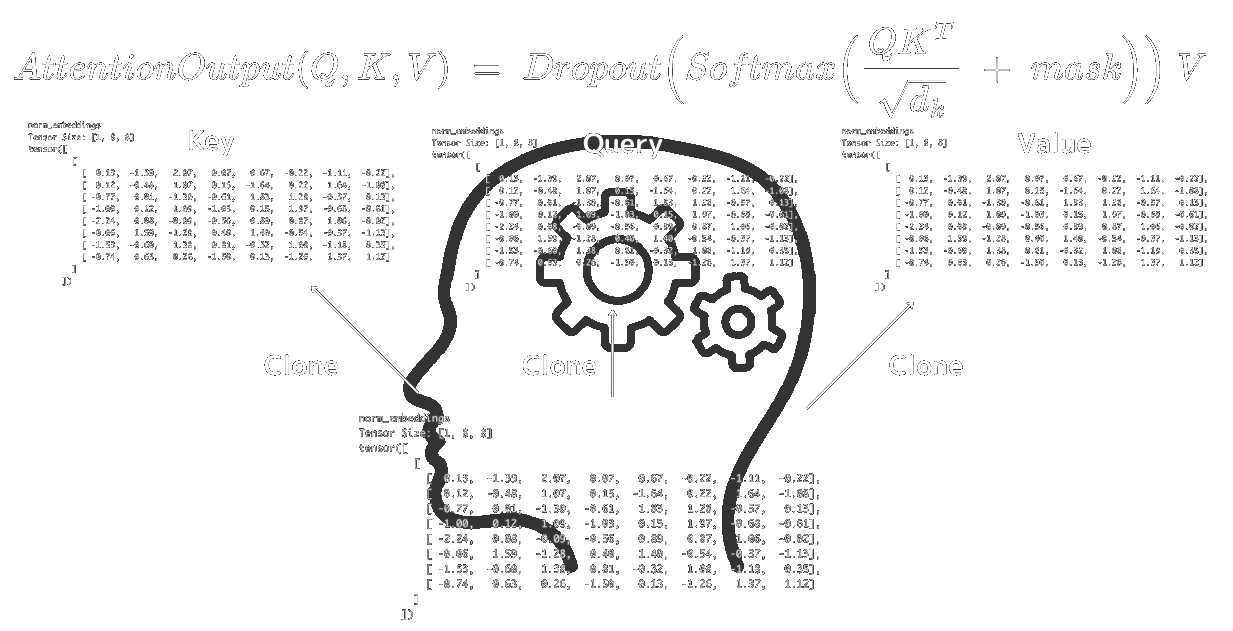

```
ভেরিয়েবল: norm_embeddings  
মেথড: clone  
আর্গুমেন্ট: নেই  
```

```
new_variable = original_variable.method(arguments)  
```

In [ ]:
# একক হেড অ্যাটেনশন
key_tensor = norm_embeddings.clone() # TODO: original_variable.method(আর্গুমেন্ট)
query_tensor = norm_embeddings.clone() # TODO: original_variable.method(আর্গুমেন্ট)
value_tensor = norm_embeddings.clone() # TODO: original_variable.method(আর্গুমেন্ট)

প্রথমে, normalized embedding tensor-টাকে যেমন আছে তেমন ক্লোন করুন, এবং সেটা Key, Query, ও Value হিসেবে ব্যবহার করুন।

দেখতে পাচ্ছেন ডায়াগ্রামে, Key, Query, আর Value সব একই tensor।

**Head**

একটা "head" বলতে Key, Query, Value tensor তৈরি করা আর Attention output হিসাব করার পুরো প্রক্রিয়াকেই বলা হয়।

এবার, শুধু একটা Key, Query, Value সেট ব্যবহার করা হচ্ছে, তাই একটাই head আছে। এটাকে বলি Single Head Attention।  
(মনে রাখবেন: আসল Single Head Attention-এ Key, Query, Value-র ওপর linear transformation প্রয়োগ হয়, কিন্তু এখানে সেটা বাদ দেয়া হয়েছে।)

---

সবচেয়ে জরুরি জিনিস হলো Query tensor, যা দৃষ্টিভঙ্গি ঠিক করে।  
এখন, চলুন Query tensor-এর shape দেখে নেই।


In [ ]:
print_formatted_tensor("প্রশ্ন_টেনসর", query_tensor)

query_tensor
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.13,  -1.39,   2.07,   0.07,   0.67,  -0.22,  -1.11,  -0.22],
           [  0.12,  -0.48,   1.07,   0.15,  -1.64,   0.22,   1.64,  -1.08],
           [ -0.77,   0.01,  -1.30,  -0.61,   1.83,   1.28,  -0.57,   0.13],
           [ -1.00,   0.12,   1.09,  -1.03,   0.15,   1.97,  -0.68,  -0.61],
           [ -2.24,   0.08,  -0.09,  -0.56,   0.89,   0.87,   1.06,  -0.02],
           [ -0.06,   1.59,  -1.28,   0.40,   1.40,  -0.54,  -0.37,  -1.13],
           [ -1.53,  -0.60,   1.38,   0.81,  -0.32,   1.08,  -1.18,   0.35],
           [ -0.74,   0.63,   0.26,  -1.50,   0.13,  -1.26,   1.37,   1.12]
         ]
       ])


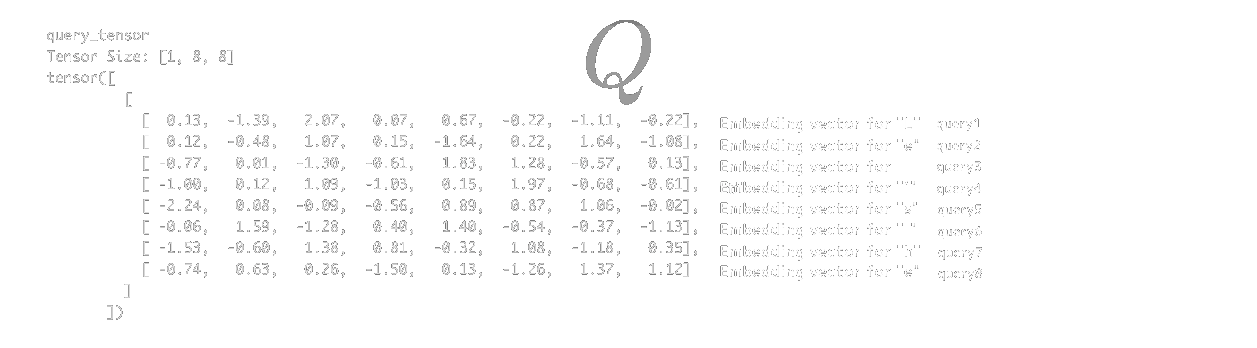

Query tensor তৈরী হয় normalized embedding tensor কে সহজেই ক্লোন করে।<br>
তাহলে, $query_{i}$ হলো ঠিক সেই normalized embedding ভেক্টর যা $i$-তম স্ট্রিংয়ের জন্য।

<br>

এরপর, চলুন দেখি Key tensor কেমন।

In [ ]:
print_formatted_tensor("মূল_টেনসর", key_tensor)

key_tensor
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.13,  -1.39,   2.07,   0.07,   0.67,  -0.22,  -1.11,  -0.22],
           [  0.12,  -0.48,   1.07,   0.15,  -1.64,   0.22,   1.64,  -1.08],
           [ -0.77,   0.01,  -1.30,  -0.61,   1.83,   1.28,  -0.57,   0.13],
           [ -1.00,   0.12,   1.09,  -1.03,   0.15,   1.97,  -0.68,  -0.61],
           [ -2.24,   0.08,  -0.09,  -0.56,   0.89,   0.87,   1.06,  -0.02],
           [ -0.06,   1.59,  -1.28,   0.40,   1.40,  -0.54,  -0.37,  -1.13],
           [ -1.53,  -0.60,   1.38,   0.81,  -0.32,   1.08,  -1.18,   0.35],
           [ -0.74,   0.63,   0.26,  -1.50,   0.13,  -1.26,   1.37,   1.12]
         ]
       ])


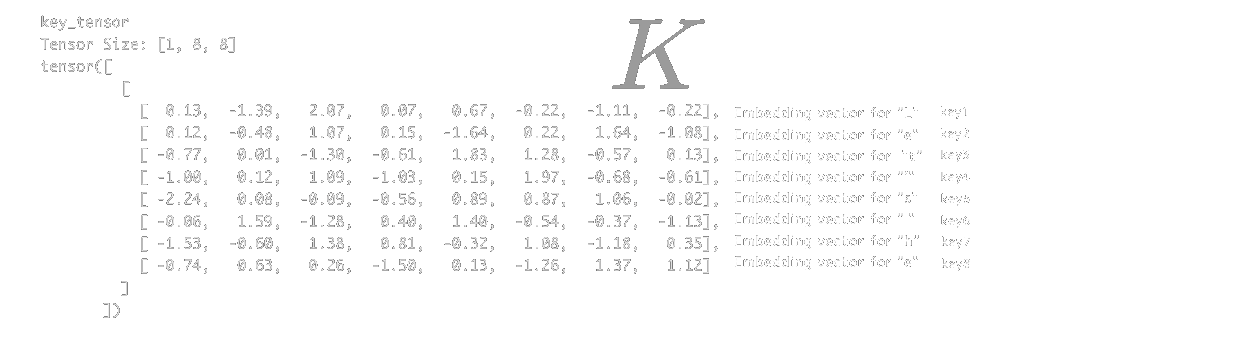

যেহেতু Key টেনসর হল normalized embedding টেনসরের সরাসরি ক্লোন,

$key_{i}$ হলো $i$-তম স্ট্রিংয়ের নিজস্ব normalized embedding ভেক্টর।

এখন, নিচের AttentionOutput হিসেব করার দিকে এগিয়ে চলছি।

$$
{AttentionOutput}(Q, K, V)
\;=\;
{Dropout}\Bigl(
  {Softmax}\Bigl(
    \frac{QK^{T}}{\sqrt{d_{k}}}
    \;+\;
    {mask}
  \Bigr)
\Bigr)\;V
$$

<br>
<br>

প্রথমে, Query এবং Key ব্যবহার করে attention weight হিসেব করি।

$$
{AttentionWeights}=\frac{Q\,K^T}{\sqrt{d_k}}
$$

এই ধাপগুলো অনুসরণ করুন:

1. Key টেনসরকে transpose করুন  
2. embedding dimension এর বর্গমূল $\sqrt{d_k}$ দিয়ে ভাগ করুন  
3. বামে থেকে Query টেনসরের সাথে dot product নিন

**1. Key টেন্সরের Transpose নিন**

$$
{K^T}
$$

`-2` এবং `-1` অর্থ "শেস থেকে দ্বিতীয়" এবং "শেসের মাত্রা"।<br>
`transpose(-2, -1)` শেষ দুই মাত্রা বদলে দেয়।<br>
একই কাজের জন্য আপনি `transpose(-1, -2)`-ও ব্যবহার করতে পারেন।

In [ ]:
key_transpose = key_tensor.transpose(-2, -1)# TODO: key_tensor.transpose (প্রতিস্থাপন করার জন্য মাত্রাসমূহের সেট)। দ্বিতীয় দুইটি মাত্রা স্থানান্তর করুন।
print_formatted_tensor("মূল key_tensor", key_tensor)
print_formatted_tensor("কী_ট্রান্সপোজ", key_transpose)

Original key_tensor
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.13,  -1.39,   2.07,   0.07,   0.67,  -0.22,  -1.11,  -0.22],
           [  0.12,  -0.48,   1.07,   0.15,  -1.64,   0.22,   1.64,  -1.08],
           [ -0.77,   0.01,  -1.30,  -0.61,   1.83,   1.28,  -0.57,   0.13],
           [ -1.00,   0.12,   1.09,  -1.03,   0.15,   1.97,  -0.68,  -0.61],
           [ -2.24,   0.08,  -0.09,  -0.56,   0.89,   0.87,   1.06,  -0.02],
           [ -0.06,   1.59,  -1.28,   0.40,   1.40,  -0.54,  -0.37,  -1.13],
           [ -1.53,  -0.60,   1.38,   0.81,  -0.32,   1.08,  -1.18,   0.35],
           [ -0.74,   0.63,   0.26,  -1.50,   0.13,  -1.26,   1.37,   1.12]
         ]
       ])
key_transpose
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.13,   0.12,  -0.77,  -1.00,  -2.24,  -0.06,  -1.53,  -0.74],
           [ -1.39,  -0.48,   0.01,   0.12,   0.08,   1.59,  -0.60,   0.63],
           [  2.07,   1.07,  -1.30,   1.09,  -0.09,  -1.28,   1.38,   0.26],
           [ 

$$
\frac{K^T}{\sqrt{d_k}}
$$

In [ ]:
# একটি “head” Key, Query, এবং Value টেনসর তৈরি করে অ্যাটেনশন হিসাব করতে।
# head_size হল এর এম্বেডিং মাত্রা—এই ক্ষেত্রে, ৮।

head_size = 8
key_transpose_scaled = key_transpose * head_size ** (-0.5) # TODO: ফর্মুলাটি প্রয়োগ করুন।
print_formatted_tensor("কী_ট্রান্সপোজ_স্কেলড", key_transpose_scaled)

key_transpose_scaled
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.05,   0.04,  -0.27,  -0.36,  -0.79,  -0.02,  -0.54,  -0.26],
           [ -0.49,  -0.17,   0.00,   0.04,   0.03,   0.56,  -0.21,   0.22],
           [  0.73,   0.38,  -0.46,   0.38,  -0.03,  -0.45,   0.49,   0.09],
           [  0.03,   0.05,  -0.21,  -0.36,  -0.20,   0.14,   0.29,  -0.53],
           [  0.24,  -0.58,   0.65,   0.05,   0.32,   0.49,  -0.11,   0.05],
           [ -0.08,   0.08,   0.45,   0.70,   0.31,  -0.19,   0.38,  -0.44],
           [ -0.39,   0.58,  -0.20,  -0.24,   0.37,  -0.13,  -0.42,   0.48],
           [ -0.08,  -0.38,   0.05,  -0.22,  -0.01,  -0.40,   0.12,   0.39]
         ]
       ])


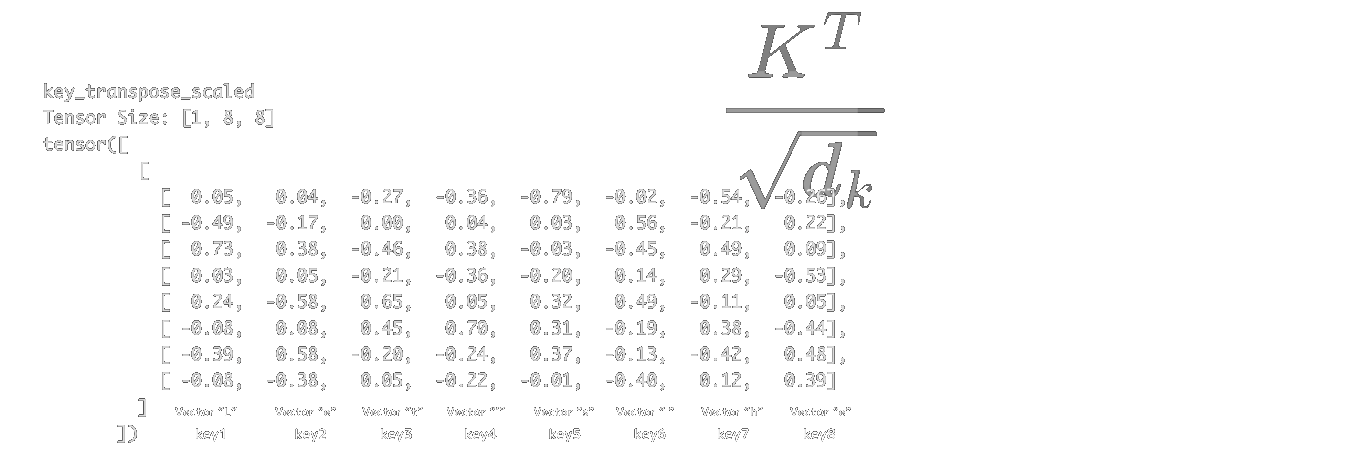

$$
\frac{Q\,K^T}{\sqrt{d_k}}
$$

এখানে $Q$ হলো কোয়েরি ম্যাট্রিক্স, $K^T$ হলো কী ম্যাট্রিক্সের ট্রান্সপোজ, আর $d_k$ হলো কী ভেক্টরের মাত্রার স্কয়ার রুট। এই সূত্রটি হলো মনোযোগ স্কোর নির্ণয়ের জন্য ব্যবহৃত স্কেলড ডট-প্রোডাক্ট। অর্থাৎ, $Q$ এবং $K^T$ এর ডট-প্রোডাক্টকে $d_k$ এর স্কয়ার রুট দিয়ে ভাগ করা হয় যেন বৃহৎ মাত্রার ফলে মান অনেক বেড়ে না যায়।

In [ ]:
attention_weights_before_mask = query_tensor @ key_transpose_scaled # TODO: query_tensor এবং key_transpose_tensor এর অভ্যন্তরীণ গুণফল
print_formatted_tensor("মাস্কের আগে মনোযোগ ওজন", attention_weights_before_mask)

attention_weights_before_mask
Tensor Size: [1, 8, 8]
tensor([
         [
           [  2.83,   0.07,  -0.47,   0.86,  -0.49,  -1.10,   1.53,  -0.69],
           [  0.07,   2.83,  -1.90,   0.20,  -0.00,  -1.37,   0.06,   0.07],
           [ -0.47,  -1.90,   2.83,   1.09,   1.53,   1.21,   0.14,  -0.30],
           [  0.86,   0.20,   1.09,   2.83,   1.37,  -0.51,   1.69,  -0.51],
           [ -0.49,  -0.00,   1.53,   1.37,   2.83,   0.20,   0.77,   1.05],
           [ -1.10,  -1.37,   1.21,  -0.51,   0.20,   2.83,  -1.16,  -0.28],
           [  1.53,   0.06,   0.14,   1.69,   0.77,  -1.16,   2.83,  -0.96],
           [ -0.69,   0.07,  -0.30,  -0.51,   1.05,  -0.28,  -0.96,   2.83]
         ]
       ])


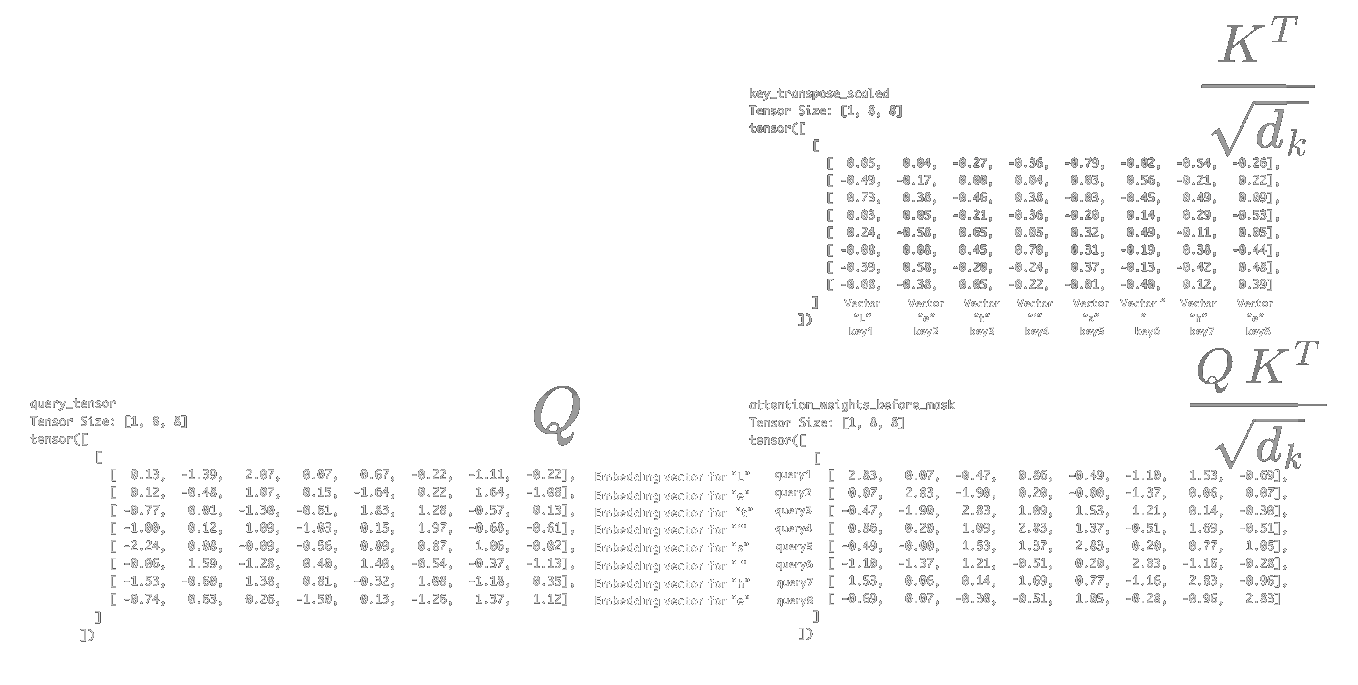

**`Check Point`** <label><input type="checkbox"> ← উপরের ফলাফল নিচের উত্তরের সঙ্গে মিলে গেলে এই বক্সে চেক দিন<label>

```
attention_weights_before_mask
Tensor Size: [1, 8, 8]
tensor([
         [
           [  2.83,   0.07,  -0.47,   0.86,  -0.49,  -1.10,   1.53,  -0.69],
           [  0.07,   2.83,  -1.90,   0.20,  -0.00,  -1.37,   0.06,   0.07],
           [ -0.47,  -1.90,   2.83,   1.09,   1.53,   1.21,   0.14,  -0.30],
           [  0.86,   0.20,   1.09,   2.83,   1.37,  -0.51,   1.69,  -0.51],
           [ -0.49,  -0.00,   1.53,   1.37,   2.83,   0.20,   0.77,   1.05],
           [ -1.10,  -1.37,   1.21,  -0.51,   0.20,   2.83,  -1.16,  -0.28],
           [  1.53,   0.06,   0.14,   1.69,   0.77,  -1.16,   2.83,  -0.96],
           [ -0.69,   0.07,  -0.30,  -0.51,   1.05,  -0.28,  -0.96,   2.83]
         ]
       ])
```

`attention_weights_before_mask` আউটপুটটাকে একটি হিটম্যাপ হিসেবে দেখাও।

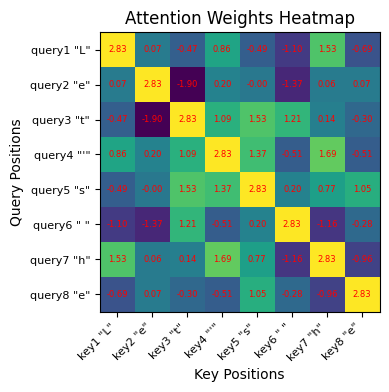

In [ ]:
# নিচের কোডটি শুধু দৃশ্যায়িত, তাই আপনি এটি এড়িয়ে যেতে পারেন।
attention_weights_numpy = attention_weights_before_mask.detach().cpu().numpy()[0]  # আকৃতি: (sequence_length, sequence_length)
sequence_length = 8

# লেবেল সংজ্ঞা
query_labels = [
    'query1 "L"', 'query2 "e"', 'query3 "t"', 'query4 "\'"',
    'query5 "s"', 'query6 " "', 'query7 "h"', 'query8 "e"'
]

key_labels = [
    'key1 "L"', 'key2 "e"', 'key3 "t"', 'key4 "\'"',
    'key5 "s"', 'key6 " "', 'key7 "h"', 'key8 "e"'
]

# ছোট আকার ও ছোট ফন্টের কমপ্যাক্ট ডিসপ্লে
fig, ax = plt.subplots(figsize=(4, 4))
heatmap = ax.imshow(attention_weights_numpy, aspect='equal')

for i in range(sequence_length):
    for j in range(sequence_length):
        ax.text(
            j, i,
            f"{attention_weights_numpy[i, j]:.2f}",  # দশমিকের পর ২ অঙ্ক দেখান
            ha='center', va='center',
            color='red',
            fontsize=6
        )

# কাস্টম লেবেল সেটিংস (ফন্ট সাইজও নির্ধারিত)
ax.set_xticks(range(sequence_length))
ax.set_xticklabels(key_labels, rotation=45, ha='right', fontsize=8)
ax.set_yticks(range(sequence_length))
ax.set_yticklabels(query_labels, fontsize=8)

ax.set_xlabel('Key Positions', fontsize=10)
ax.set_ylabel('Query Positions', fontsize=10)
ax.set_title('Attention Weights Heatmap', fontsize=12)

plt.tight_layout(pad=1.0)
plt.show()

Attention weights দেখায় কতটা একটা query তার মানগুলোর সাথে মিশে যায়।<br><br>

উদাহরণস্বরূপ, `query_1` (“L” টোকেন) এর দৃষ্টিকোণ থেকে,<br>
`key_1` ভেক্টর, যেটা একই “L” এর সাথে মেলে, সর্বোচ্চ স্কোর পায়।<br>
তাই এটা বেশি করে `value_1` থেকে তথ্য টানবে।<br><br>

মনে রাখবেন, এই মিল একদম র্যান্ডম, অনট্রেইনড মডেল থেকে এসেছে।<br>
ট্রেনিং দেখাবে আসলে কী গুরুত্বপূর্ণ।<br>
এখন জন্য মাথায় রাখুন:<br>
উচ্চ মিল মানে বেশি মান মিশ্রণ।<br><br>

**মূল কথা:**<br>
এখানে “Similarity” মানে শুধু সত্যিকারের পরস্পর সমার্থক শব্দ নয়, যেমন “violin” ও “cello।”<br><br>
(self-)attention এ similarity মানে প্রসঙ্গগত সম্পর্কও।<br>
এটা সেই শব্দগুলো খুঁজে দেয় যেগুলো একসাথে থাকে।<br><br>
উদাহরণস্বরূপ:<br>

> “The chef chopped onions with a knife.”<br>
> এখানে, “chopped” শব্দটি “chef” ও “knife” এর সাথে জোরালোভাবে যুক্ত।<br>
> এটা দেখায় কে কাজ করলো আর কী দিয়ে করলো।<br>

এই সম্পর্কগুলো মডেলকে আসল প্রসঙ্গ বুঝতে সাহায্য করে।

**মাস্ক তৈরি করুন**

$$
\frac{QK^{T}}{\sqrt{d_{k}}}
\;+\;
{mask}
$$

In [ ]:
head_size = 8
mask = torch.triu(torch.ones(head_size, head_size), diagonal=1) # TODO: মাস্ক তৈরি করুন। দেখুন সেকশন ৫।
print_formatted_tensor("মাস্ক", mask)

mask
Tensor Size: [8, 8]
tensor([
         [  0.00,   1.00,   1.00,   1.00,   1.00,   1.00,   1.00,   1.00],
         [  0.00,   0.00,   1.00,   1.00,   1.00,   1.00,   1.00,   1.00],
         [  0.00,   0.00,   0.00,   1.00,   1.00,   1.00,   1.00,   1.00],
         [  0.00,   0.00,   0.00,   0.00,   1.00,   1.00,   1.00,   1.00],
         [  0.00,   0.00,   0.00,   0.00,   0.00,   1.00,   1.00,   1.00],
         [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   1.00,   1.00],
         [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   1.00],
         [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00]
       ])


In [ ]:
attention_weights_masked = attention_weights_before_mask.masked_fill(mask == 1, float('-inf')) # TODO: `attention_weights_before_mask`-এ মাস্ক প্রয়োগ করুন। দেখুন সেকশন ৫।
print_formatted_tensor("মনোযোগ_ওজন_ত্রিভুজীয়", attention_weights_masked)

attention_weights_tril
Tensor Size: [1, 8, 8]
tensor([
         [
           [  2.83,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf],
           [  0.07,   2.83,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf],
           [ -0.47,  -1.90,   2.83,   -inf,   -inf,   -inf,   -inf,   -inf],
           [  0.86,   0.20,   1.09,   2.83,   -inf,   -inf,   -inf,   -inf],
           [ -0.49,  -0.00,   1.53,   1.37,   2.83,   -inf,   -inf,   -inf],
           [ -1.10,  -1.37,   1.21,  -0.51,   0.20,   2.83,   -inf,   -inf],
           [  1.53,   0.06,   0.14,   1.69,   0.77,  -1.16,   2.83,   -inf],
           [ -0.69,   0.07,  -0.30,  -0.51,   1.05,  -0.28,  -0.96,   2.83]
         ]
       ])


**Softmax**

$$
{Softmax}\Bigl(
    \frac{QK^{T}}{\sqrt{d_{k}}}
    \;+\;
    {mask}
  \Bigr)
$$

এখানে, $Q$ হলো Query, $K$ হলো Key, এবং $d_k$ হলো Key ভেক্টরের মাত্রা। \\
$\frac{QK^{T}}{\sqrt{d_{k}}}$ অংশটি attention স্কোর হিসাব করে, যেখানে ভাগ করার কারণ হলো ভেক্টরের মাত্রার স্কেল কমানো যাতে Softmax এর আউটপুট বেশি স্থিতিশীল হয়। \\
$mask$ হলো এমন একটি ম্যাট্রিক্স যা নির্দিষ্ট অবস্থানগুলোতে স্কোরকে খুব ছোট করে দেয়, যেমন প্যাডিং টোকেন বা ভবিষ্যৎ তথ্য লুকানোর জন্য। \\
শেষে Softmax ফাংশন প্রয়োগ করে স্কোরগুলোকে সম্ভাবনায় রূপান্তর করা হয়।

In [ ]:
import torch.nn.functional as F
attention_weights_softmax = F.softmax(attention_weights_masked, dim=-1)
print_formatted_tensor("মনোযোগ ওজন সফটম্যাক্স", attention_weights_softmax)

attention_weights_softmax
Tensor Size: [1, 8, 8]
tensor([
         [
           [  1.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
           [  0.06,   0.94,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
           [  0.04,   0.01,   0.96,   0.00,   0.00,   0.00,   0.00,   0.00],
           [  0.10,   0.05,   0.13,   0.72,   0.00,   0.00,   0.00,   0.00],
           [  0.02,   0.04,   0.17,   0.15,   0.63,   0.00,   0.00,   0.00],
           [  0.01,   0.01,   0.15,   0.03,   0.05,   0.75,   0.00,   0.00],
           [  0.15,   0.03,   0.04,   0.17,   0.07,   0.01,   0.53,   0.00],
           [  0.02,   0.05,   0.03,   0.03,   0.12,   0.03,   0.02,   0.71]
         ]
       ])


$$
{Dropout}\Bigl(
  {Softmax}\Bigl(
    \frac{QK^{T}}{\sqrt{d_{k}}}
    \;+\;
    {mask}
  \Bigr)
\Bigr)
$$

এখানে, $Q$, $K$ হলো কুয়েরি এবং কী ম্যাট্রিক্স, আর $d_k$ তাদের ডাইমেনশন। প্রথমে আমরা $QK^{T}$ ভাগ করি $\sqrt{d_k}$ দিয়ে, যা স্কেলিং করে। তারপর সেই মানে আমরা $mask$ যোগ করি, যা নির্দিষ্ট পজিশন ব্লক করতে সাহায্য করে। শেষে আমরা Softmax লাগিয়ে প্রোবাবিলিটি পাই এবং Dropout দিয়ে কিছু মান বাদ দিই, যা ওভারফিটিং আটকায়।

In [ ]:
dropout = DeterministicDropout()
attention_weights_dropout = dropout.forward(attention_weights_softmax)
print_formatted_tensor("মনোযোগ ওজন ড্রপআউট", attention_weights_dropout)

attention_weights_dropout
Tensor Size: [1, 8, 8]
tensor([
         [
           [  1.11,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
           [  0.07,   1.04,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
           [  0.04,   0.01,   1.06,   0.00,   0.00,   0.00,   0.00,   0.00],
           [  0.11,   0.06,   0.14,   0.80,   0.00,   0.00,   0.00,   0.00],
           [  0.03,   0.04,   0.19,   0.00,   0.69,   0.00,   0.00,   0.00],
           [  0.02,   0.00,   0.00,   0.03,   0.06,   0.83,   0.00,   0.00],
           [  0.16,   0.04,   0.04,   0.19,   0.08,   0.01,   0.59,   0.00],
           [  0.02,   0.05,   0.00,   0.03,   0.13,   0.04,   0.02,   0.79]
         ]
       ])


| attention\_weights\_dropout            | Value1  | Value2 | Value3 | Value4 | Value5 | Value6 | Value7 | Value8 |
| -------------------------------------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| Query1-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও | 1.11   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| Query2-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও | 0.07   | 1.04   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| Query3-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও | 0.04   | 0.01   | 1.06   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| Query4-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও | 0.11   | 0.06   | 0.14   | 0.80   | 0.00   | 0.00   | 0.00   | 0.00   |
| Query5-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও | 0.03   | 0.04   | 0.19   | 0.00   | 0.69   | 0.00   | 0.00   | 0.00   |
| Query6-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও | 0.02   | 0.00   | 0.00   | 0.03   | 0.06   | 0.83   | 0.00   | 0.00   |
| Query7-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও | 0.16   | 0.04   | 0.04   | 0.19   | 0.08   | 0.01   | 0.59   | 0.00   |
| Query8-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও | 0.02   | 0.05   | 0.00   | 0.03   | 0.13   | 0.04   | 0.02   | 0.79   |


প্রতিটি ক্যোয়ারির দৃষ্টিকোণ থেকে, এটা বুঝে নিয়েছে কিভাবে value1, value2, ..., value8 মিশাতে হয়!

এখন শুধু বাকিটা হলো ভাবেই মিশিয়ে ফেলা!

চলুন Value টেনসরটা দেখে নেই!

In [ ]:
print_formatted_tensor("মান টেনসর", value_tensor)

value tensor
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.13,  -1.39,   2.07,   0.07,   0.67,  -0.22,  -1.11,  -0.22],
           [  0.12,  -0.48,   1.07,   0.15,  -1.64,   0.22,   1.64,  -1.08],
           [ -0.77,   0.01,  -1.30,  -0.61,   1.83,   1.28,  -0.57,   0.13],
           [ -1.00,   0.12,   1.09,  -1.03,   0.15,   1.97,  -0.68,  -0.61],
           [ -2.24,   0.08,  -0.09,  -0.56,   0.89,   0.87,   1.06,  -0.02],
           [ -0.06,   1.59,  -1.28,   0.40,   1.40,  -0.54,  -0.37,  -1.13],
           [ -1.53,  -0.60,   1.38,   0.81,  -0.32,   1.08,  -1.18,   0.35],
           [ -0.74,   0.63,   0.26,  -1.50,   0.13,  -1.26,   1.37,   1.12]
         ]
       ])


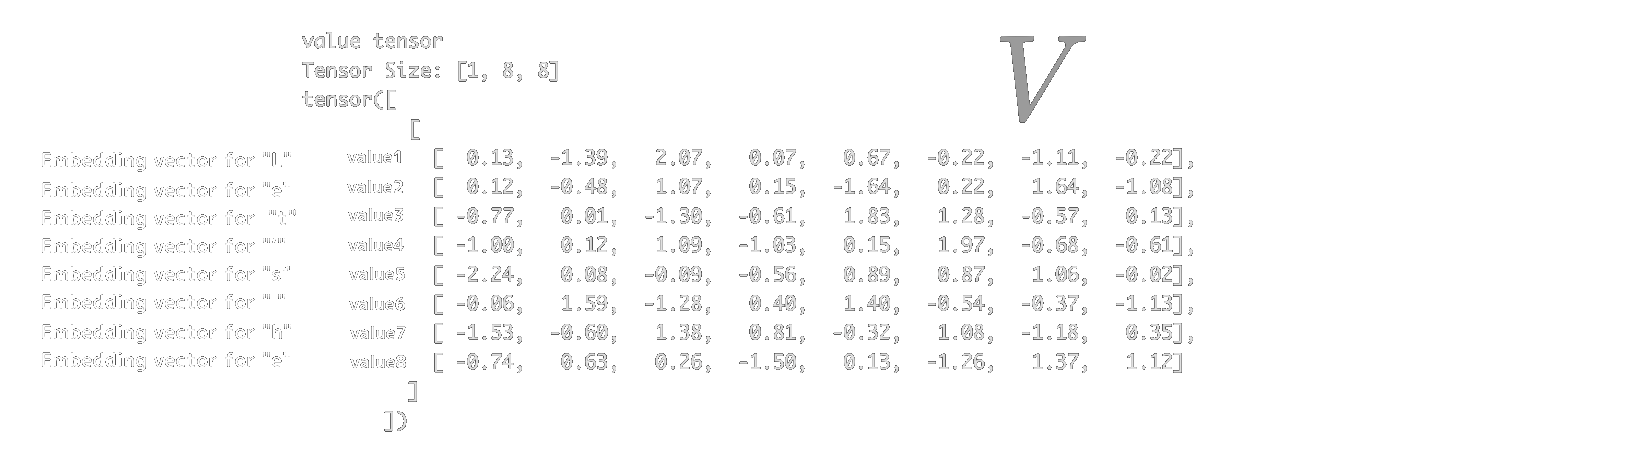

$$
{AttentionOutput}(Q, K, V)
\;=\;
{Dropout}\Bigl(
  {Softmax}\Bigl(
    \frac{QK^{T}}{\sqrt{d_{k}}}
    \;+\;
    {mask}
  \Bigr)
\Bigr)\;V
$$

এখানে, প্রশ্ন ভেক্টর $Q$, কী ভেক্টর $K$, এবং মান ভেক্টর $V$ থেকে অ্যাটেনশন আউটপুট হিসেব করা হয়।<br>
প্রথমে, $Q$ ও $K$ এর গুণফল $\frac{QK^{T}}{\sqrt{d_k}}$ হিসেব করা হয়, যেখানে $d_k$ হলো কী ভেক্টরের ডাইমেনশন (মাপ) — এর স্কোয়ার রুট দিয়ে ভাগ দেয়া হয় যাতে মান নিয়ন্ত্রিত থাকে এবং গ্রেডিয়েন্ট বেশি বড় না হয়।<br>
এরপর, ঐ ফলাফলের সাথে $mask$ যোগ করা হয় যা কিছু পজিশন বা ভ্যালু ব্লক বা ফিল্টার করে।<br>
তারপর Softmax ফাংশন ব্যবহার করে সম্ভবপর গুরুত্বের স্কোর দেওয়া হয়।<br>
এরপর Dropout প্রয়োগ করে কিছু নোড র‍্যান্ডম বাদ দেওয়া হয় যাতে ওভারফিটিং কমে।<br>
সবশেষে, এই ওজনযুক্ত স্কোর $V$ এর সাথে গুণ করা হয় যেন মূল তথ্যগুলোর গুরুত্ব অনুযায়ী আউটপুট হয়।

In [ ]:
attention_output = attention_weights_dropout @ value_tensor # TODO: `attention_weights_dropout` এবং `value_tensor` এর ডট প্রোডাক্ট নিন
print_formatted_tensor("মনোযোগ আউটপুট", attention_output)

attention_output
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.14,  -1.54,   2.30,   0.08,   0.74,  -0.25,  -1.23,  -0.25],
           [  0.13,  -0.59,   1.26,   0.17,  -1.67,   0.21,   1.64,  -1.15],
           [ -0.81,  -0.05,  -1.29,  -0.64,   1.95,   1.36,  -0.64,   0.12],
           [ -0.89,  -0.09,   0.98,  -0.89,   0.36,   1.74,  -0.66,  -0.56],
           [ -1.69,   0.01,  -0.21,  -0.50,   0.91,   0.85,   0.67,  -0.04],
           [ -0.21,   1.30,  -1.00,   0.27,   1.23,  -0.34,  -0.29,  -0.96],
           [ -1.27,  -0.55,   1.33,   0.24,   0.05,   1.10,  -0.89,   0.00],
           [ -0.93,   0.50,   0.30,  -1.25,   0.20,  -0.81,   1.22,   0.77]
         ]
       ])


এতে Single Head Attention-এর AttentionOutput হিসাব সম্পূর্ণ হলো!

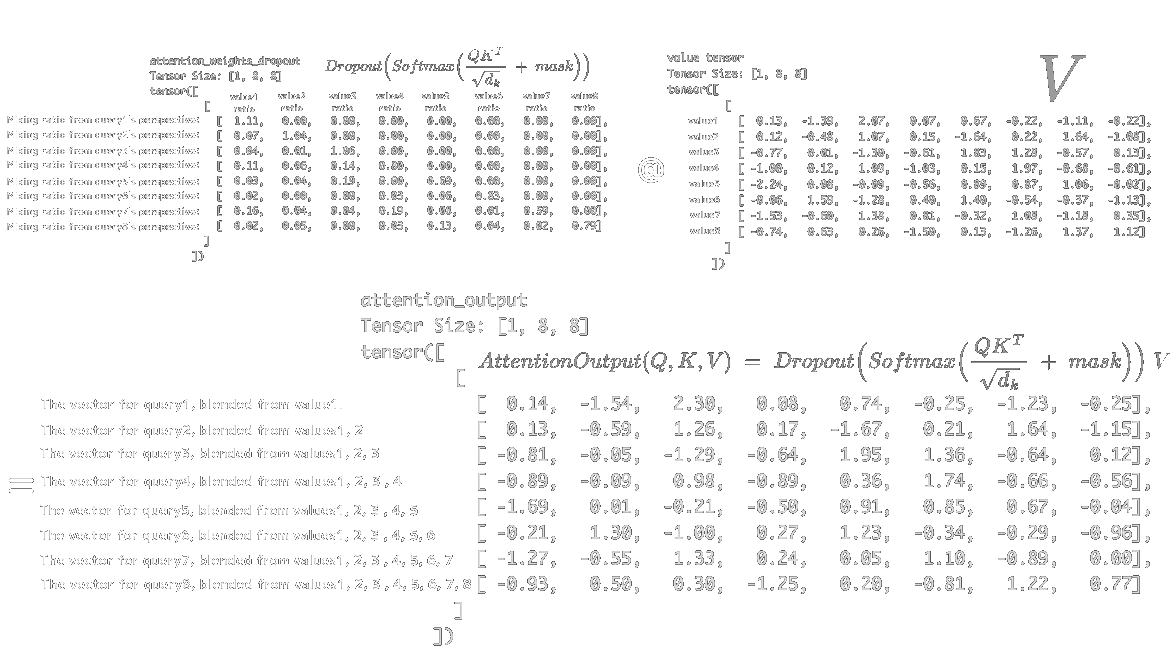

**Chapter 6: Section 7: Single Head Attention** <label><input type="checkbox"> Mark as completed</label>

### Section 8: Multi-Head Attention

Single Head Attention-এ ৮টা query ভেক্টর থাকে: query1, query2, ..., query8।

অর্থাৎ, এটা ৮টা আলাদা দৃষ্টিভঙ্গি থেকে মিশিয়ে ফেলে।

আপনি কি মনে করেন ৮টা দৃষ্টিভঙ্গি বেশি না কম?

আসলে সেটা “কিছুটা” বেশি।

তাই, একটা বড় হেডের বদলে, মডেল কয়েকটা ছোট হেড ব্যবহার করে।

এটাই Multi Head Attention।

উদাহরণস্বরূপ, যদি দুইটা হেড তৈরি করেন,<br>
প্রত্যেক হেডে token এর সমান query থাকে (৮),<br>
তাহলে মিলিয়ে হয় ৮ × ২ = ১৬ query।<br><br>
এর মানে আপনি আরও বিভিন্ন দিক থেকে দেখতে পারবেন।

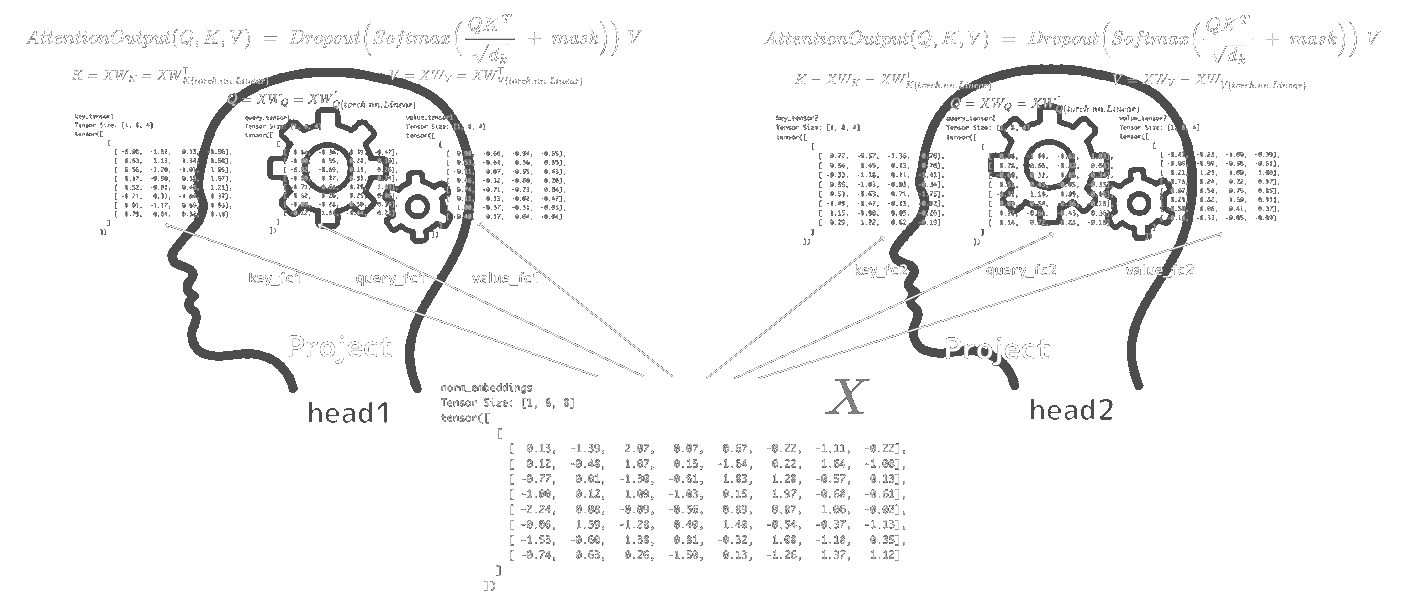

**হেড সাইজ গণনা করা**

উদাহরণস্বরূপ, একটি ৮-ডাইমেনশনাল embedding tensor দুইটি head-এ ভাগ করুন।

তাহলে, প্রতিটি head-এর embedding dimension হবে $8 / 2 = 4$।

প্রতিটি head-এর এই embedding dimension কে head size বলা হয়। এখানে, head_size = ৪।

**কেন প্রতিটি head-কে সব ৮টি dimension দেয়া হয় না?**<br>
যদি দেন, তাহলে ৮ + ৮ = ১৬ dimension হয়ে যাবে।<br>
আর বেশি head হলে এই সংখ্যা শুন্যনি বাড়বে।<br>

তাই, প্রতিটি head-এ ৪ dimension × ২ head রাখা tensor-এর আকার ঠিক রাখে।

$$
\text{Head size} = \frac{\text{Embedding dimension}}{\text{Number of heads}} \ \ = \frac{8}{2} = 4
$$

In [ ]:
embedding_dim = 8
num_heads = 2
head_size = embedding_dim / num_heads # TODO: যখন মাথার সংখ্যা ২, তখন মাথার আকার হিসাব করুন।
head_size = int(head_size) # `head_size` ফ্লোট থেকে পূর্ণসংখ্যায় রূপান্তর করুন।
print(head_size)

4


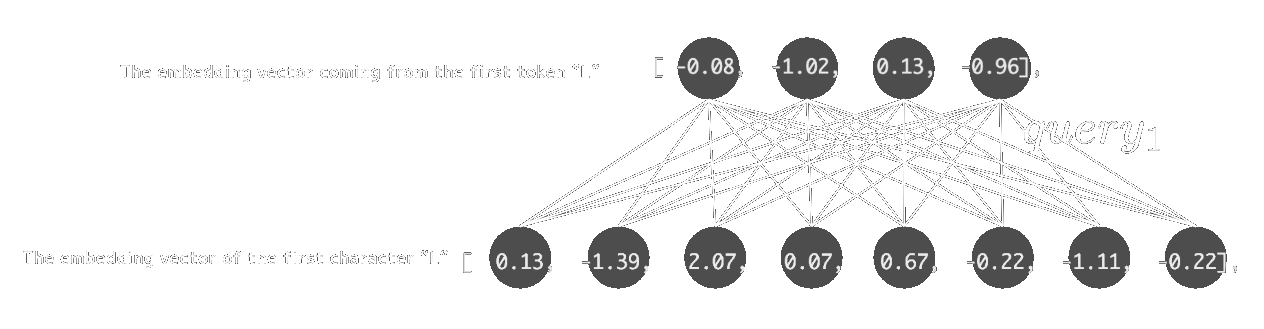

৮-মাত্রিক ভেক্টর থেকে ৪-মাত্রিক query তৈরি করার জন্য, <br>
ছবিতে দেখানো মতো একটি সম্পূর্ণ সংযুক্ত স্তর ব্যবহার করুন।

প্রথম চরিত্র `L` এর এম্বাসিং ভেক্টর দিয়ে query1 তৈরি করা হয়।<br>
তারপর, দ্বিতীয় চরিত্র `e` এর ভেক্টর থেকে query2 তৈরি হয়, ইত্যাদি।<br>

উপরের ছবিটা দেখলে, বুঝতে পারবেন সম্পূর্ণ সংযুক্ত স্তরের ৮ x ৪ = ৩২ ওজন আছে।<br>

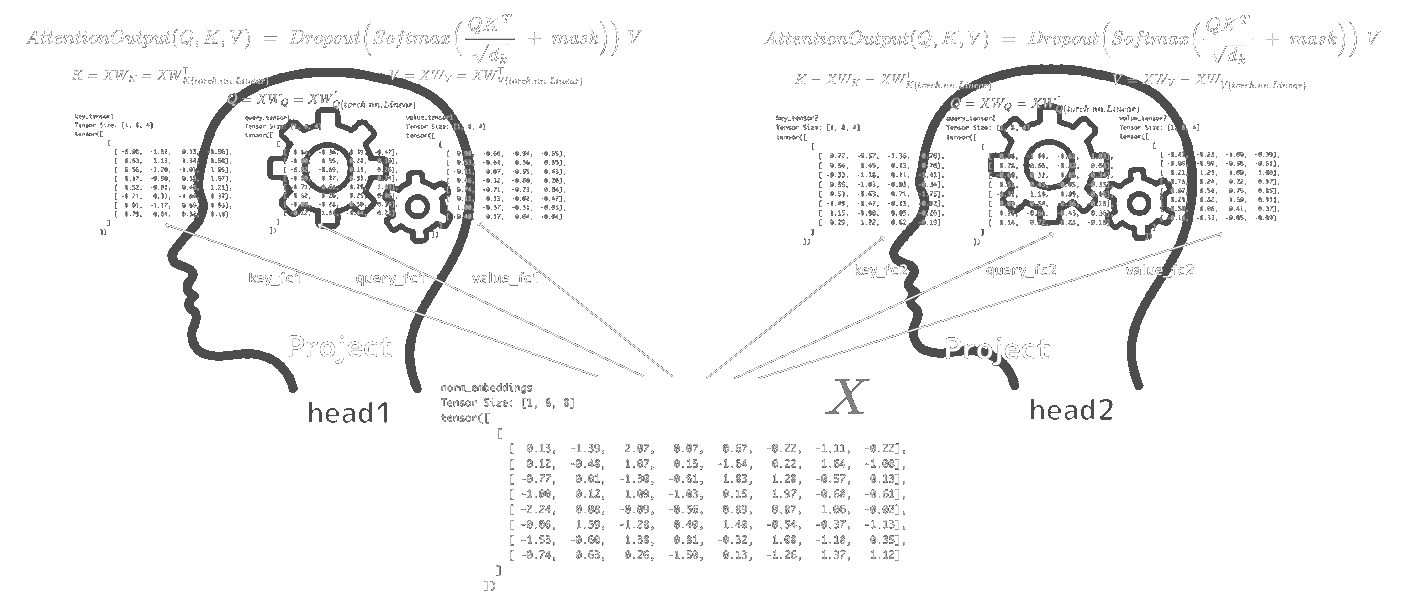

একটি head-এ একটি query_fc থাকে (কোয়ারি টেনসর তৈরি করার জন্য সম্পূর্ণ সংযুক্ত স্তর)।<br>
একই head-এর ভেতরে, query1 এবং query2 তৈরি করার সময় ওজন এক রকম থাকে।<br>
<br>
কিন্তু প্রতিটি head-এর আলাদা সম্পূর্ণ সংযুক্ত স্তর থাকে।<br>
প্রতিটি head (K, Q, V এর একটি সেট) তার নিজস্ব সম্পূর্ণ সংযুক্ত স্তর রয়েছে (key_fc, query_fc, value_fc)।<br>
এটাই প্রতিটি head-কে আলাদা কোয়ারি তৈরি করার সুবিধা দেয়, যার ফলে দর্শনভঙ্গিতে বিভিন্নতা আসে।

এখানে ভাবুন num_heads বাড়িয়ে আরও বেশি কোয়েরি তৈরি করছেন।<br><br>
উদাহরণস্বরূপ, ৮ heads ব্যবহার করুন।<br>
তাহলে পাবেন ৮ কোয়েরি × ৮ heads = ৬৪ কোয়েরি!<br><br>
কিন্তু তখন head_size ১ মাত্রার হয়ে যায়।<br>
এটা এক্সপ্রেসিভনেসকে বেশ কষ্ট দেয়।

উপরের সমীকরণটা এইভাবে লেখা যায়:

$$
\text{মাথার সংখ্যা} \times \text{মাথার আকার} = \text{এম্বেডিং মাত্রা} = \text{স্থির মান}
$$

এটা হল $x y = C$ এর মতো একটা ফরমুলা।  
এখান থেকে বুঝা যায়, একটা সমঝোতা আছে।

যদি খুব বেশি মাথা যোগাও, তাহলে মাথার আকার অনেক ছোট হয়ে যায়।  
তাহলে প্রকাশক্ষমতা কমে যায়।

চলুন একটা আসল উদাহরণ দেখি:

| Model                       | embed dim | num\_heads | head\_size (embed dim ÷ num\_heads) |
| --------------------------- | -----------------------: | ---------: | ----------------------------------: |
| GPT-1 (Radford et al. 2018) |                      768 |         12 |                                  64 |
| GPT-2 Small                 |                      768 |         12 |                                  64 |
| GPT-2 Medium                |                     1024 |         16 |                                  64 |
| GPT-2 Large                 |                     1280 |         20 |                                  64 |

এখানে GPT-2 Large-এ নজর দিন।

প্রতিটি সম্পূর্ণ সংযুক্ত স্তর (fully connected layer) ১২৮০-ডিমেনশন ইনপুট টেনসরকে ৬৪-ডিমেনশন Q (বা K, V) টেনসরে রূপান্তর করে।

এটা অনেক বড় মাত্রার হ্রাস। স্পষ্টতই, এই হ্রাস তথ্যের ক্ষতি ঘটায়।

তবুও neural nets ভালোভাবে তথ্য সংক্ষিপ্ত করতে পারে।

VAE মনে পড়ে? NNs ৩-ডিমেনশন latent থেকে ৭৬৪-ডিমেনশন MNIST ছবি এনকোড এবং পুনর্গঠন করতে পারে।

NNs তথ্য সংক্ষিপ্তকরণের ক্ষেত্রে চমৎকার।

তাই যদিও মাত্রা ছোট হয়, যথেষ্ট ট্রেইনিং থাকলে, সম্পূর্ণ সংযুক্ত স্তরগুলো দরকারি তথ্য ধরে রেখে প্রজেকশন শিখে context বুঝে পরবর্তী token অনুমান করে।

এগুলো প্রয়োজনীয় তথ্য হারাতে দেয় না।

অতএব, প্রতিটি মাথার নিজস্ব projection layer থাকে।  
তাই প্রতিটি মাথা আলাদা আলাদা queries তৈরি করে।

একসাথে ছোট projection গুলো তথ্য বিভিন্ন উপস্থান থেকে হারায়।  
ফলে গুরুত্বপূর্ণ ফিচারগুলো কিছু মাথায় থাকে।

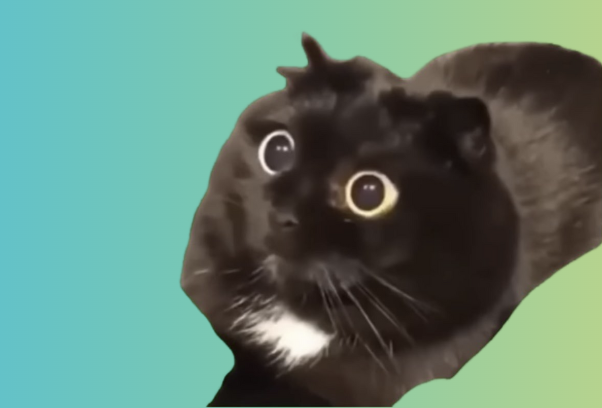

**যদি ... আমরা Embedding dimension খুব বড় করতাম?**

| Model                       | embed dim | num_heads | head_size (embed dim ÷ num_heads) |
| ------------- | -----------------: | --: | ---------: |
| GPT-3 (175 B) |              12288 |  96 |        128 |

GPT-3 (175 B)-এর মডেলের dimension ছিল অভূতপূর্ব 12,288—  
এখন আপনার আছে 96টি head, প্রতিটিতে বিশাল 128 dimension।

এখন এসেছে প্রথম বাণিজ্যিক পর্যায়ের বড় ভাষা মডেল—  
এটি পড়ায়, কোড লিখে, এমনকি আমাদের সাথে প্রেমের গল্পও করে।

কি অসাধারণ আবিষ্কาร!

---

কিন্তু এতে অনেক বেশি কম্পিউট এবং মেমরি লাগে—  
সেজন্য সাধারণ multi-head attention আজকাল আর খুব প্রচলিত নয়।

এখন দেখুন স্মার্ট ডিজাইনগুলো:

| Model              | Attention Type                |
| ------------------ | ----------------------------- |
| LLaMA 2-7B & 13B   | Multi-Query Attention (MQA)   |
| LLaMA 3 (8B & 70B) | Grouped-Query Attention (GQA) |
| DeepSeek-R1        | Multi-Latent Attention (MLA)  |

এই এক্সপেরিমেন্টে আমরা এতে গভীরভাবে যাবো না, কারণ শুরুতে এটা বুঝতে একটু কঠিন।

কিন্তু আমি জানি আপনি অপেক্ষা করতে পারবেন না। এই [Video](https://youtu.be/0VLAoVGf_74?feature=shared)¹ আপনার আগ্রহ পূরণ করবে।

Content Reference: ¹ **Welch Labs**, “The Genius of DeepSeek’s 57X Efficiency Boost [MLA],” YouTube, 24:05, Mar. 8 2025. Accessed July 5 2025.

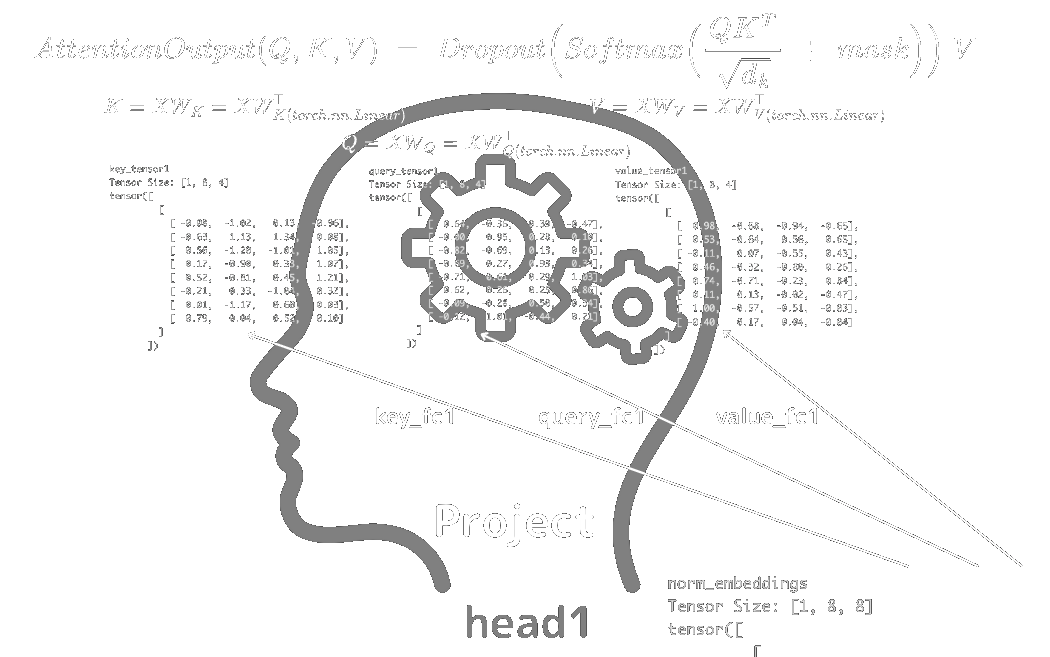

**GPT-তে Query, Value, এবং Key তৈরি করা**

`nn.Linear(embedding_dim, head_size, bias=False)` দিয়ে তিনটি সম্পূর্ণ সংযুক্ত স্তর তৈরি করুন।

মূল Query, Value, এবং Key এগুলোতে দিয়ে পাঠান।

আউটপুটগুলো নতুন Query, Value, এবং Key হিসাবে ব্যবহার করুন।

প্রশিক্ষণের আগে, এই স্তরগুলোর ওজন এলোমেলোভাবে সেট থাকে।

বায়াস না থাকায়, প্রতিটি হেডের আউটপুট একটি খাঁটি লিনিয়ার প্রজেকশন।

প্রশিক্ষণ বাড়ার সাথে এই স্তরগুলো শিখে যায় কিভাবে পরবর্তী টোকেন পূর্বানুমান করতে যথাযথ Q, K, V তৈরি করতে হয়।

```python
Instance: nn.Linear(input_dim, output_dim, bias)
input_dim: embedding_dim  # ৮
output_dim: head_size  # ৪
bias: False
```

```python
Instance: key_fc1, query_fc1, value_fc1,
Method: forward
Argument: norm_embeddings
```

In [ ]:
torch.manual_seed(1337) # একটি সিড মান সামঞ্জস্য করুন
config = ModelConfig()

# একটি সিড মান সমন্বয় করুন
embedding_module = EmbeddingModule(vocab_size = 65, config = config)
embedding_dim = 8
head_size = 4

key_fc1 = nn.Linear(embedding_dim, head_size, bias = False) # TODO: nn.Linear(ইনপুট মাত্রা, আউটপুট মাত্রা, বায়াস) সংজ্ঞায়িত করুন
key_tensor1 = key_fc1.forward(norm_embeddings) # TODO: ইনস্ট্যান্সে মেথড (আর্গুমেন্ট) প্রয়োগ করুন
print_formatted_tensor("\নkey_tensor1", key_tensor1)

query_fc1 = nn.Linear(embedding_dim, head_size, bias = False) # TODO: nn.Linear(ইনপুট মাত্রা, আউটপুট মাত্রা, বায়াস) সংজ্ঞায়িত করুন
query_tensor1 = query_fc1.forward(norm_embeddings) # TODO: ইনস্ট্যান্সে কল করুন। মেথড (আর্গুমেন্ট)
print_formatted_tensor("\nquery_tensor1", query_tensor1)

value_fc1 = nn.Linear(embedding_dim, head_size, bias = False) # TODO: nn.Linear(ইনপুট মাত্রা, আউটপুট মাত্রা, বায়াস) সংজ্ঞায়িত করুন
value_tensor1 = value_fc1.forward(norm_embeddings) # TODO: ইনস্ট্যান্স প্রয়োগ করুন। মেথড (আর্গুমেন্ট)
print_formatted_tensor("\nvalue_tensor1", value_tensor1)


key_tensor1
Tensor Size: [1, 8, 4]
tensor([
         [
           [ -0.08,  -1.02,   0.13,  -0.96],
           [ -0.63,   1.13,   1.34,   0.08],
           [  0.56,  -1.20,  -1.01,   1.05],
           [  0.17,  -0.90,   0.33,   1.07],
           [  0.52,  -0.81,   0.45,   1.21],
           [ -0.21,   0.33,  -1.04,   0.32],
           [  0.01,  -1.17,   0.60,   0.03],
           [  0.79,   0.04,   0.52,   0.10]
         ]
       ])

query_tensor1
Tensor Size: [1, 8, 4]
tensor([
         [
           [  0.64,  -0.36,   0.39,  -0.47],
           [ -0.00,   0.95,   0.28,   0.10],
           [ -0.82,  -0.69,   0.13,   0.26],
           [ -0.69,   0.27,   0.93,   0.34],
           [ -0.71,   0.61,   0.29,   1.03],
           [  0.62,   0.26,   0.25,   0.86],
           [ -0.09,  -0.28,   0.50,   0.34],
           [ -0.12,   1.01,  -0.44,   0.21]
         ]
       ])

value_tensor1
Tensor Size: [1, 8, 4]
tensor([
         [
           [  0.98,  -0.68,  -0.94,  -0.65],
           [  0.53,  -0

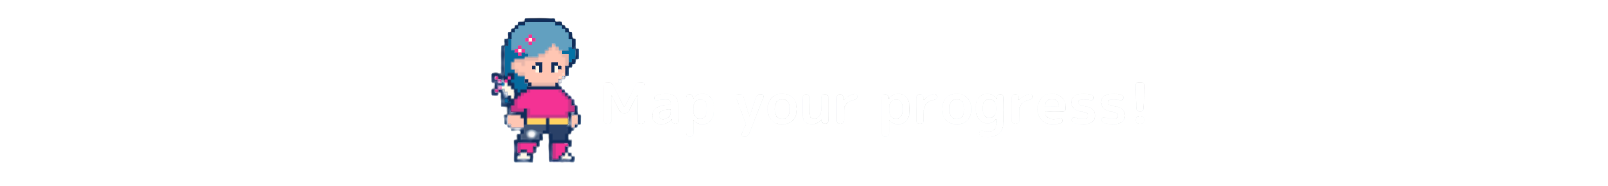

**Note:** আমরা যেহেতু `bias=False` সেট করেছি, তাই কোনো বায়াস টার্ম $b$ নেই।

---

এবার প্রতিটি সম্পূর্ণ সংযুক্ত স্তরের ওজনগুলো দেখে নেই: $W_K$, $W_Q$, এবং $W_V$।

সাধারণ ম্যাট্রিক্স গুণনের নোটেশন আর PyTorch-এর `nn.Linear`-এর মধ্যে একটা সূক্ষ্ম পার্থক্য আছে:

* **গাণিতিক রূপ:** যদি ইনপুট $X\in\mathbb{R}^{T\times D}$ (এখানে $T=8$, $D=8$) কে ছোট মাত্রায় $d=4$ প্রজেক্ট করেন, তাহলে লিখবেন

  $$
    Y = X\,W
    \quad\text{যেখানে}\quad
    W\in\mathbb{R}^{D\times d}.
  $$

  স্পষ্ট করে বললে, $X\in\mathbb{R}^{8\times 8}$, $W\in\mathbb{R}^{8\times 4}$, আর তাই $Y\in\mathbb{R}^{8\times 4}$।
  বিশেষ করে, $W$-র আকার (shape) হলো $(8,4)$।

* **PyTorch `nn.Linear`**: অভ্যন্তরে তার ওজন হিসাবে সংরক্ষণ করে

  $$
    W_{\text{torch.nn.Linear}}\;\in\;\mathbb{র}^{d\times D},
  $$

  এবং হিসেব করে

  $$
    Y = X\,W_{\text{torch.nn.Linear}}^{T}.
  $$

  অর্থাৎ, ডট-প্রোডাক্ট করার আগে স্টোর করা ওজনকে ট্রান্সপোজ করে। স্পষ্ট করে, `linear.weight.shape == (4,8)`।

---

**প্রধান সূত্রসমূহ**

1. **Textbook**

   $$
   Y = X\,W,\quad
   X\in\mathbb{R}^{8\times8},\;
   W\in\mathbb{R}^{8\times4}.
   $$

2. **PyTorch `nn.Linear(8,4)`**

   $$
   Y = X\,W_{\text{torch.nn.Linear}}^{T},\quad
   X\in\mathbb{R}^{8\times8},\;
   W_{\text{torch.nn.Linear}}\in\mathbb{R}^{4\times8}.
   $$

|            |                          | Weight Shape                                               | Implemented Calculation Formula | Output Shape |
| :--------: | :--------------------------- | :--------------------------------------------------------- | :----------------------------------------------------- | :--------- |
| **In Math** | ${W}$                      | `(8, 4) = (embedding dimension, head size)`               | $Y = X \mathbin{@} W$                                 | `(8, 4)`   |
| **In Code** | $W_{{torch.nn.Linear}}$ | `(4, 8) = (head size, embedding dimension)`               | $Y = X \mathbin{@} W_{{torch.nn.Linear}}^{\!\top}$  | `(8, 4)`   |


In [ ]:
print_formatted_tensor("\nkey_fc1.weight", key_fc1.weight) # key_fc ওজন দেখান


key_fc1.weight
Tensor Size: [4, 8]
tensor([
         [ -0.18,  -0.06,  -0.09,  -0.30,   0.07,  -0.06,  -0.06,   0.24],
         [  0.34,   0.30,  -0.06,   0.15,  -0.31,  -0.11,   0.35,  -0.21],
         [ -0.23,  -0.05,   0.30,   0.01,  -0.35,   0.01,   0.27,  -0.00],
         [ -0.33,   0.08,  -0.30,  -0.32,  -0.09,   0.33,   0.05,  -0.21]
       ])


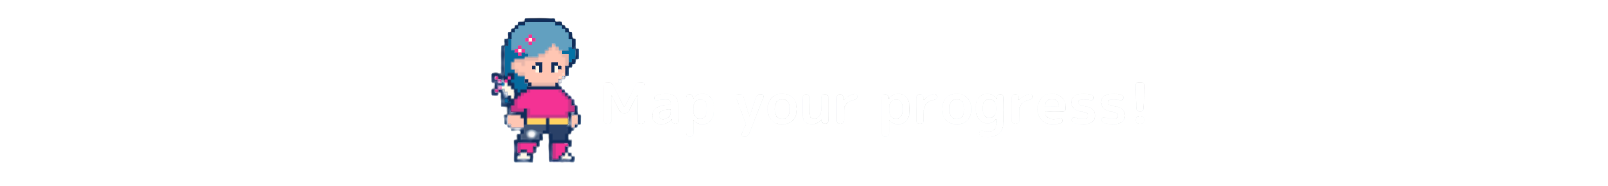

In [ ]:
print_formatted_tensor("\nquery_fc1.weight", query_fc1.weight) # query_fc ওজন দেখান
print_formatted_tensor("\nvalue_fc1.weight", value_fc1.weight) # value_fc এর ওজন দেখান


query_fc1.weight
Tensor Size: [4, 8]
tensor([
         [  0.17,   0.22,   0.31,   0.34,   0.19,  -0.33,  -0.02,  -0.09],
         [ -0.20,   0.35,   0.23,  -0.17,  -0.13,  -0.16,   0.30,  -0.23],
         [ -0.02,   0.18,   0.26,   0.04,   0.10,   0.24,  -0.03,  -0.22],
         [ -0.35,   0.35,   0.06,   0.20,   0.13,   0.04,   0.16,  -0.15]
       ])

value_fc1.weight
Tensor Size: [4, 8]
tensor([
         [ -0.31,  -0.13,   0.34,   0.32,   0.22,  -0.01,   0.09,  -0.28],
         [  0.29,   0.28,  -0.15,  -0.10,  -0.08,   0.06,  -0.11,   0.30],
         [  0.14,   0.14,  -0.13,   0.28,  -0.17,   0.04,   0.33,   0.11],
         [ -0.16,  -0.26,  -0.25,  -0.05,  -0.12,   0.28,   0.31,  -0.05]
       ])


সাধারণত, এ নিয়ে ভাবতে হয় না, কিন্তু যখন গভীর শিক্ষার মডেল API আকারে ডিপ্লয় করবেন তখন এটা খুবই জরুরি।

অর্ধেক ডিপ্লয়মেন্টের ভুল আসলে PyTorch কীভাবে টেনসর ট্রান্সপোজ হ্যান্ডেল করে তার একটা রসিকতা নয়।

**Chapter 6: Section 8: Multi-Head Attention** <label><input type="checkbox"> Mark as Done</label>

### Section 9: Forward

`-2` এবং `-1` মানে "দ্বিতীয় শেষ" এবং "শেষ মাত্রা"। <br>
`transpose(-2, -1)` শেষ দুইটি মাত্রার জায়গা বদলায়। <br>
`transpose(-1, -2)`-ও ব্যবহার করতে পারেন—দুটোই একদম ঠিক কাজ করে।

In [ ]:
key_transpose1 = key_tensor1.transpose(-2, -1)
print_formatted_tensor("key_transpose1", key_transpose1)

key_transpose1
Tensor Size: [1, 4, 8]
tensor([
         [
           [ -0.08,  -0.63,   0.56,   0.17,   0.52,  -0.21,   0.01,   0.79],
           [ -1.02,   1.13,  -1.20,  -0.90,  -0.81,   0.33,  -1.17,   0.04],
           [  0.13,   1.34,  -1.01,   0.33,   0.45,  -1.04,   0.60,   0.52],
           [ -0.96,   0.08,   1.05,   1.07,   1.21,   0.32,   0.03,   0.10]
         ]
       ])


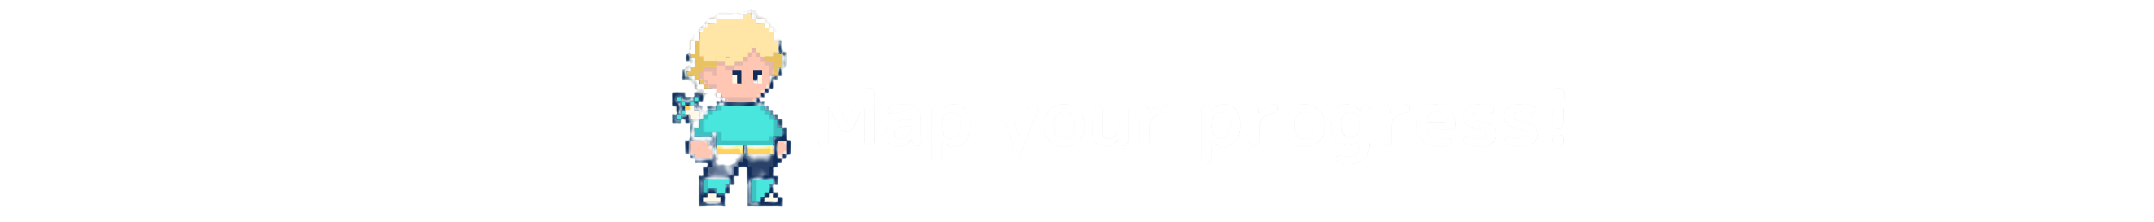

In [ ]:
num_heads = 2
head_size = int(embedding_dim / num_heads) # 8/2 = 4
key_transpose_scaled1 = key_transpose1 * head_size ** (-0.5)
print_formatted_tensor("key_transpose_scaled1", key_transpose_scaled1)

key_transpose_scaled1
Tensor Size: [1, 4, 8]
tensor([
         [
           [ -0.04,  -0.31,   0.28,   0.08,   0.26,  -0.10,   0.01,   0.40],
           [ -0.51,   0.57,  -0.60,  -0.45,  -0.41,   0.16,  -0.59,   0.02],
           [  0.07,   0.67,  -0.51,   0.16,   0.23,  -0.52,   0.30,   0.26],
           [ -0.48,   0.04,   0.52,   0.54,   0.61,   0.16,   0.01,   0.05]
         ]
       ])


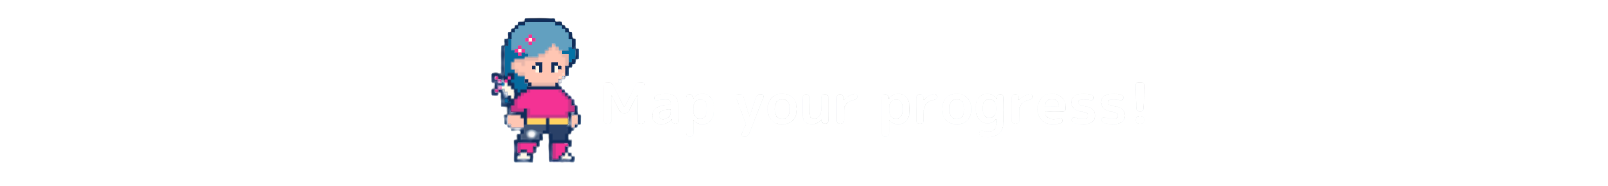

In [ ]:
attention_weights_before_mask1 = query_tensor1 @ key_transpose_scaled1
print_formatted_tensor("মাস্কের আগে মনোযোগ ওজন ১", attention_weights_before_mask1)

attention_weights_before_mask1
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.41,  -0.16,  -0.05,   0.03,   0.12,  -0.40,   0.33,   0.32],
           [ -0.52,   0.73,  -0.66,  -0.33,  -0.26,   0.03,  -0.47,   0.10],
           [  0.27,  -0.04,   0.25,   0.40,   0.25,  -0.05,   0.44,  -0.29],
           [ -0.21,   1.01,  -0.65,   0.15,   0.12,  -0.31,   0.12,  -0.01],
           [ -0.76,   0.81,  -0.18,   0.26,   0.25,   0.19,  -0.26,  -0.14],
           [ -0.55,   0.16,   0.34,   0.44,   0.63,  -0.02,  -0.06,   0.36],
           [  0.02,   0.22,   0.06,   0.38,   0.41,  -0.24,   0.32,   0.11],
           [ -0.64,   0.33,  -0.31,  -0.42,  -0.42,   0.44,  -0.72,  -0.13]
         ]
       ])


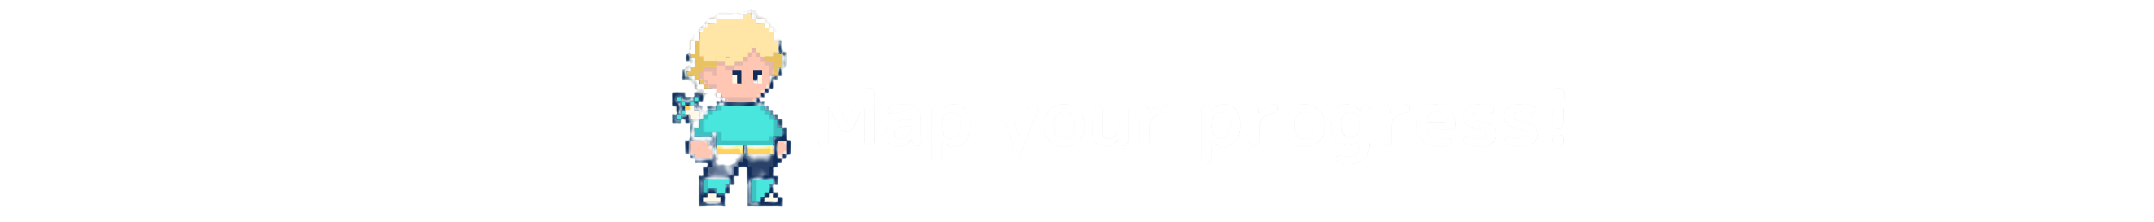

In [ ]:
mask = torch.triu(torch.ones(1, 8, 8), diagonal=1)
print_formatted_tensor("মাস্ক", mask)

mask
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.00,   1.00,   1.00,   1.00,   1.00,   1.00,   1.00,   1.00],
           [  0.00,   0.00,   1.00,   1.00,   1.00,   1.00,   1.00,   1.00],
           [  0.00,   0.00,   0.00,   1.00,   1.00,   1.00,   1.00,   1.00],
           [  0.00,   0.00,   0.00,   0.00,   1.00,   1.00,   1.00,   1.00],
           [  0.00,   0.00,   0.00,   0.00,   0.00,   1.00,   1.00,   1.00],
           [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   1.00,   1.00],
           [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   1.00],
           [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00]
         ]
       ])


In [ ]:
attention_weights_masked1 = attention_weights_before_mask1.masked_fill(mask == 1, float('-inf'))
print_formatted_tensor("অ্যাটেনশন_ওয়েটস_মাস্কড1", attention_weights_masked1)

attention_weights_masked1
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.41,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf],
           [ -0.52,   0.73,   -inf,   -inf,   -inf,   -inf,   -inf,   -inf],
           [  0.27,  -0.04,   0.25,   -inf,   -inf,   -inf,   -inf,   -inf],
           [ -0.21,   1.01,  -0.65,   0.15,   -inf,   -inf,   -inf,   -inf],
           [ -0.76,   0.81,  -0.18,   0.26,   0.25,   -inf,   -inf,   -inf],
           [ -0.55,   0.16,   0.34,   0.44,   0.63,  -0.02,   -inf,   -inf],
           [  0.02,   0.22,   0.06,   0.38,   0.41,  -0.24,   0.32,   -inf],
           [ -0.64,   0.33,  -0.31,  -0.42,  -0.42,   0.44,  -0.72,  -0.13]
         ]
       ])


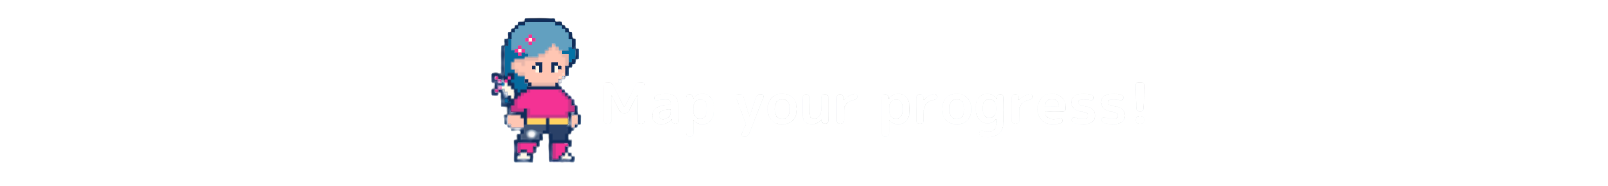

In [ ]:
import torch.nn.functional as F
attention_weights_softmax1 = F.softmax(attention_weights_masked1, dim=-1)
print_formatted_tensor("মনোযোগ_ওজন_সফটম্যাক্স1", attention_weights_softmax1)

attention_weights_softmax1
Tensor Size: [1, 8, 8]
tensor([
         [
           [  1.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
           [  0.22,   0.78,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
           [  0.37,   0.27,   0.36,   0.00,   0.00,   0.00,   0.00,   0.00],
           [  0.15,   0.52,   0.10,   0.22,   0.00,   0.00,   0.00,   0.00],
           [  0.08,   0.37,   0.14,   0.21,   0.21,   0.00,   0.00,   0.00],
           [  0.08,   0.15,   0.19,   0.20,   0.25,   0.13,   0.00,   0.00],
           [  0.12,   0.15,   0.13,   0.17,   0.18,   0.09,   0.16,   0.00],
           [  0.08,   0.20,   0.11,   0.10,   0.10,   0.23,   0.07,   0.13]
         ]
       ])


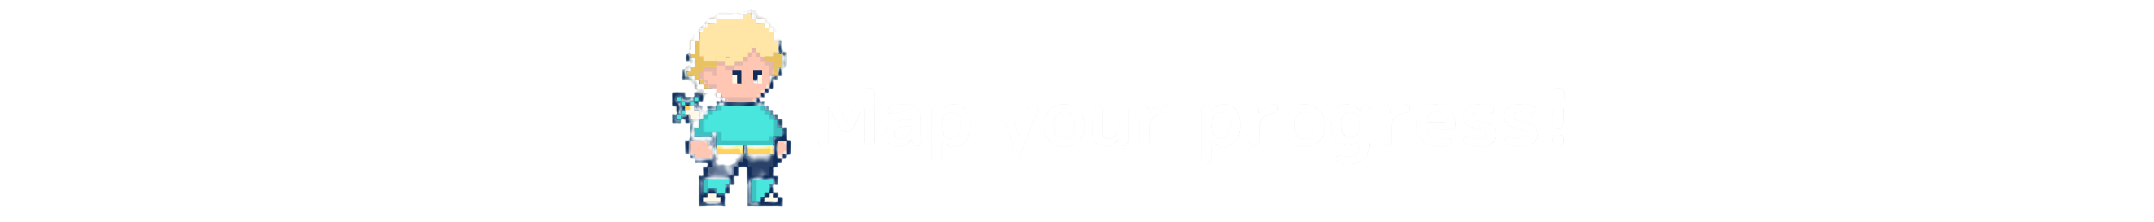

```python
Instance: dropout
Method: forward (or optional)
Argument: attention_weights_softmax
```

In [ ]:
dropout = DeterministicDropout()
attention_weights_dropout1 = dropout.forward(attention_weights_softmax1)
print_formatted_tensor("অ্যাটেনশন_ওয়েটস_ড্রপআউট1", attention_weights_dropout1)

attention_weights_dropout1
Tensor Size: [1, 8, 8]
tensor([
         [
           [  1.11,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
           [  0.25,   0.86,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
           [  0.41,   0.30,   0.40,   0.00,   0.00,   0.00,   0.00,   0.00],
           [  0.17,   0.58,   0.11,   0.25,   0.00,   0.00,   0.00,   0.00],
           [  0.08,   0.41,   0.15,   0.00,   0.23,   0.00,   0.00,   0.00],
           [  0.08,   0.00,   0.00,   0.23,   0.28,   0.14,   0.00,   0.00],
           [  0.13,   0.16,   0.14,   0.19,   0.20,   0.10,   0.18,   0.00],
           [  0.09,   0.22,   0.00,   0.11,   0.11,   0.25,   0.08,   0.14]
         ]
       ])


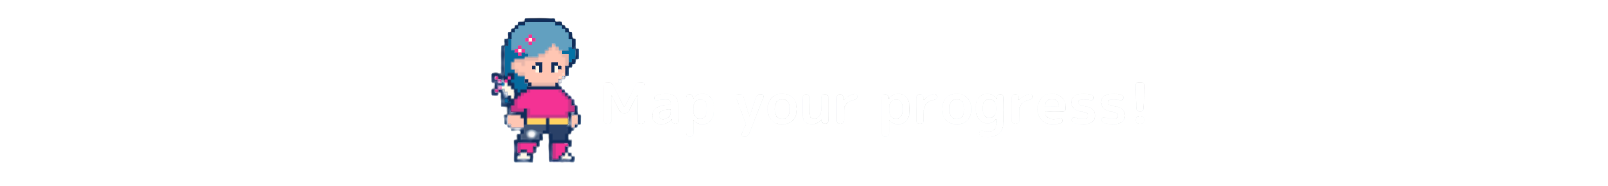

| attention_weights_dropout1                | Value1 | Value2 | Value3 | Value4 | Value5 | Value6 | Value7 | Value8 |
| ----------------------------------------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| Query1-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও     | 1.11   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| Query2-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও     | 0.25   | 0.86   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| Query3-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও     | 0.41   | 0.30   | 0.40   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| Query4-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও     | 0.17   | 0.58   | 0.11   | 0.25   | 0.00   | 0.00   | 0.00   | 0.00   |
| Query5-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও     | 0.08   | 0.41   | 0.15   | 0.00   | 0.23   | 0.00   | 0.00   | 0.00   |
| Query6-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও     | 0.08   | 0.00   | 0.00   | 0.23   | 0.28   | 0.14   | 0.00   | 0.00   |
| Query7-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও     | 0.13   | 0.16   | 0.14   | 0.19   | 0.20   | 0.10   | 0.18   | 0.00   |
| Query8-এর দৃষ্টিকোণ থেকে মিক্সিং রেশিও     | 0.09   | 0.22   | 0.00   | 0.11   | 0.11   | 0.25   | 0.08   | 0.14   |

In [ ]:
attention_output1 = attention_weights_dropout1 @ value_tensor1
print_formatted_tensor("অ্যাটেনশন_আউটপুট1", attention_output1)

attention_output1
Tensor Size: [1, 8, 4]
tensor([
         [
           [  1.09,  -0.75,  -1.05,  -0.72],
           [  0.70,  -0.72,   0.25,   0.40],
           [  0.51,  -0.44,  -0.43,   0.10],
           [  0.58,  -0.56,  -0.09,   0.38],
           [  0.45,  -0.47,   0.01,   0.47],
           [  0.41,  -0.31,  -0.33,   0.17],
           [  0.63,  -0.48,  -0.40,   0.24],
           [  0.38,  -0.30,  -0.10,   0.08]
         ]
       ])


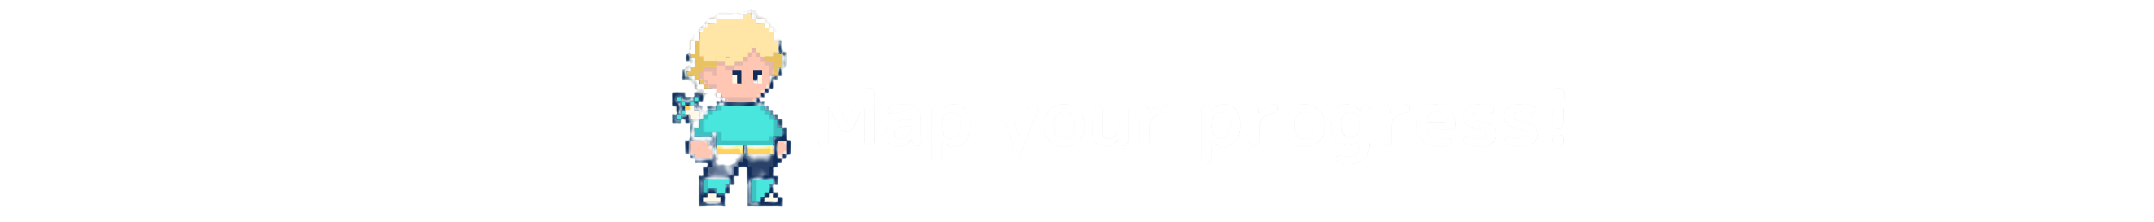

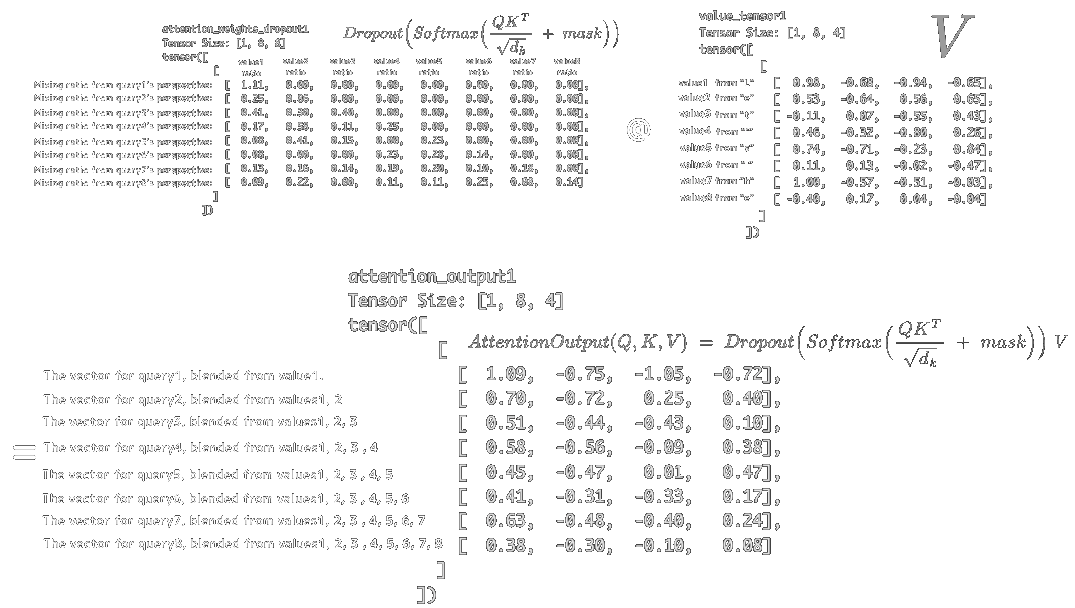

**Section 11: forward** <label><input type="checkbox"> Mark as done</label>

### Section 10: একটি ক্লাস সংজ্ঞায়িত করা

🔘 **Options**: আপনি হয়তো এমন অতিরিক্ত অপশন দেখতে পাবেন যা আপনার দরকার পড়বে না।

`head_size`　　`config.embedding_dim`　　`mask == 1`　　`mask == 0`　　`forward`　　`nn.Linear`　　`self.key_fc`　　`Key`　　`Query`　　`Value`　　`F.softmax`　　`self.dropout`

In [ ]:
"""
ক্ষেত্রটি অবশ্যই পূরণ করতে হবে।class AttentionHead(nn.Module):
    def __init__(self, head_size, config):
        super().__init__()
        self.key_fc= nn.Linear(______________, ________, bias=False)
        self.query_fc = nn.Linear(config.embedding_dim, head_size, bias=False)
        self.value_fc = nn.Linear(config.embedding_dim, head_size, bias=False)

        # মাস্ক তৈরি হয় নিম্ন ত্রিভুজাকার ম্যাট্রিক্স ব্যবহার করে (self-attention এর কারণিকতা বজায় রেখে)
        self.register_buffer('tril', torch.tril(torch.ones(config.input_sequence_length, config.input_sequence_length)))

        # ড্রপআউট (নির্ধারিত সংস্করণ আলাদাভাবে সংজ্ঞায়িত)
        self.dropout = DeterministicDropout(config.dropout_rate)

        self.head_size = head_size

    def forward(self, input_tensor):
        B, T, C = input_tensor.shape  # ব্যাচ, টোকেন দৈর্ঘ্য, এমবেডিং চ্যানেল

        Key = __________.forward(input_tensor)     # (বি, টি, হেড_সাইজ)
        Query = self.query_fc.forward(input_tensor)   # (বি, টি, হেড_সাইজ)
        Value = self.value_fc.forward(input_tensor)   # (বি, টি, হেড_সাইজ)

        # অ্যাটেনশন স্কোর গণনা (QK^T) / sqrt(embedding_dim)
        attention_weights_before_mask = ______ @ ____.transpose(-2, -1) * self.head_size**(-0.5)

        # মাস্ক প্রয়োগ হয়েছে
        mask = torch.triu(torch.ones(T, T), diagonal=1).to(input_tensor.device)
        masked_attention_weights = attention_weights_before_mask.masked_fill(___________, float('-inf'))

        # সফটম্যাক্স → ড্রপআউট → ওজনযুক্ত যোগফল
        attention_weights = ________(masked_attention_weights, dim=-1)
        attention_weights = _____________(attention_weights)

        out = attention_weights @ _____  # (বি, টি, হেড_সাইজ)
        return out
"""


"\nclass AttentionHead(nn.Module):\n    def __init__(self, head_size, config):\n        super().__init__()\n        self.key_fc= nn.Linear(______________, ________, bias=False)\n        self.query_fc = nn.Linear(config.embedding_dim, head_size, bias=False)\n        self.value_fc = nn.Linear(config.embedding_dim, head_size, bias=False)\n\n        # Masks are created using the lower triangular matrix (maintaining the causality of self-attention)\n        self.register_buffer('tril', torch.tril(torch.ones(config.input_sequence_length, config.input_sequence_length)))\n\n        # Dropout (deterministic version is defined separately)\n        self.dropout = DeterministicDropout(config.dropout_rate)\n\n        self.head_size = head_size\n\n    def forward(self, input_tensor):\n        B, T, C = input_tensor.shape  # Batch, Token Length, Embedding Channel\n\n        Key = __________.forward(input_tensor)     # (B, T, head_size)\n        Query = self.query_fc.forward(input_tensor)   # (B, T, h

In [ ]:
class AttentionHead(nn.Module):
    def __init__(self, head_size, config):
        super().__init__()
        self.key_fc= nn.Linear(config.embedding_dim, head_size, bias=False)
        self.query_fc = nn.Linear(config.embedding_dim, head_size, bias=False)
        self.value_fc = nn.Linear(config.embedding_dim, head_size, bias=False)

        # মাস্কগুলো তৈরি হয় নিচের ত্রিভুজাকার ম্যাট্রিক্স ব্যবহার করে (self-attention এর কারণিকতা বজায় রেখে)
        self.register_buffer('tril', torch.tril(torch.ones(config.input_sequence_length, config.input_sequence_length)))

        # ড্রপআউট (নির্ধারিত সংস্করণ আলাদাভাবে সংজ্ঞায়িত)
        self.dropout = DeterministicDropout(config.dropout_rate)

        self.head_size = head_size

    def forward(self, input_tensor):
        B, T, C = input_tensor.shape  # ব্যাচ, টোকেন দৈর্ঘ্য, এমবেডিং চ্যানেল

        Key = self.key_fc.forward(input_tensor)     # (বি, টি, হেড_সাইজ)
        Query = self.query_fc.forward(input_tensor)   # (বি, টি, হেড_সাইজ)
        Value = self.value_fc.forward(input_tensor)   # (বি, টি, হেড_সাইজ)

        # অ্যাটেনশন স্কোর হিসাব করা হচ্ছে (QK^T) / sqrt(embedding_dim)
        attention_weights_before_mask = Query @ Key.transpose(-2, -1) * self.head_size**(-0.5)

        # মাস্ক প্রয়োগ করা হয়েছে
        mask = torch.triu(torch.ones(T, T), diagonal=1).to(input_tensor.device)
        masked_attention_weights = attention_weights_before_mask.masked_fill(mask == 1, float('-inf'))

        # সফ্টম্যাক্স → ড্রপআউট → ওজনযুক্ত যোগফল
        attention_weights = F.softmax(masked_attention_weights, dim=-1)
        attention_weights = self.dropout(attention_weights)

        out = attention_weights @ Value  # (বি, টি, হেড_সাইজ)
        return out

<details>
<summary>উত্তর দেখাতে/লুকাতে এখানে ক্লিক করুন</summary>

```python
class AttentionHead(nn.Module):
    def __init__(self, head_size, config):
        super().__init__()
        self.key_fc= nn.Linear(config.embedding_dim, head_size, bias=False)
        self.query_fc = nn.Linear(config.embedding_dim, head_size, bias=False)
        self.value_fc = nn.Linear(config.embedding_dim, head_size, bias=False)

        # মাস্ক তৈরি করা হয় নীচের ত্রিভুজাকার ম্যাট্রিক্স দিয়ে (self-attention এর কারণমূলক ক্রম বজায় রাখতে)
        self.register_buffer('tril', torch.tril(torch.ones(config.input_sequence_length, config.input_sequence_length)))

        # Dropout (ডিটারমিনিস্টিক ভার্সন আলাদাভাবে সংজ্ঞায়িত)
        self.dropout = DeterministicDropout(config.dropout_rate)

        self.head_size = head_size

    def forward(self, input_tensor):
        B, T, C = input_tensor.shape  # ব্যাচ, টোকেন লম্বা, এমবেডিং চ্যানেল

        Key = self.key_fc.forward(input_tensor)     # (B, T, head_size)
        Query = self.query_fc.forward(input_tensor)   # (B, T, head_size)
        Value = self.value_fc.forward(input_tensor)   # (B, T, head_size)

        # Attention স্কোর গণনা (QK^T) / sqrt(head_size)
        attention_weights_before_mask = Query @ Key.transpose(-2, -1) * self.head_size**(-0.5)

        # মাস্ক প্রয়োগ করা হয়েছে
        mask = torch.triu(torch.ones(T, T), diagonal=1).to(input_tensor.device)
        masked_attention_weights = attention_weights_before_mask.masked_fill(mask == 1, float('-inf'))

        # Softmax → Dropout → ওজনযুক্ত যোগফল
        attention_weights = F.softmax(masked_attention_weights, dim=-1)
        attention_weights = self.dropout(attention_weights)

        out = attention_weights @ Value  # (B, T, head_size)
        return out
```

In [ ]:
# মডেল সেটিংস সংরক্ষণ করার কনফিগারেশন ক্লাস
class ModelConfig:
    batch_size = 1  # একবারে প্রক্রিয়াকরণের ডেটার সংখ্যা (ব্যাচ সাইজ)
    input_sequence_length = 8  # ইনপুট ডেটার দৈর্ঘ্য (সিকোয়েন্স দৈর্ঘ্য)
    embedding_dim = 8  # এম্বেডেড লেয়ারের আকার (ফিচার ভেক্টরের মাত্রার সংখ্যা)
    dropout_rate = 0.1  # ড্রপআউট সম্ভাবনা

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1337)

# ModelConfig এর একটি ইনস্ট্যান্স তৈরি করা হচ্ছে। কোন কনফিগারেশন প্যারামিটার (কনস্ট্রাক্টর) নেই।
config = ModelConfig()
# head_size হিসাব করা হচ্ছে
num_heads = 2
head_size = int(config.embedding_dim / num_heads)

# EmbeddingModule এর একটি ইনস্ট্যান্স তৈরি করা হচ্ছে।
embedding_module = EmbeddingModule(vocab_size = 65, config = config)
layer_norm = nn.LayerNorm(config.embedding_dim)
attention_head = AttentionHead(head_size = head_size, config = config)

# Let's he এর সাথে সামঞ্জস্যপূর্ণ। (ব্যাচ সাইজ, টোকেন দৈর্ঘ্য) = (1, 8)
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])

embeddings = embedding_module.forward(sample_input_tokens)
norm_embeddings = layer_norm(embeddings)
attention_output1 = attention_head(norm_embeddings) # TODO: ইনস্ট্যান্স.Method(Argument)
print_formatted_tensor("মনোযোগ_আউটপুট1", attention_output1)

NameError: name 'ModelConfig' is not defined

**`Check Point`** <label><input type="checkbox"> ← উপরের ফলাফল নিচের উত্তরের সাথে মিললে এই বক্সে টিক দিন<label>

```
attention_output1
Tensor Size: [1, 8, 4]
tensor([
         [
           [  1.09,  -0.75,  -1.05,  -0.72],
           [  0.70,  -0.72,   0.25,   0.40],
           [  0.51,  -0.44,  -0.43,   0.10],
           [  0.58,  -0.56,  -0.09,   0.38],
           [  0.45,  -0.47,   0.01,   0.47],
           [  0.41,  -0.31,  -0.33,   0.17],
           [  0.63,  -0.48,  -0.40,   0.24],
           [  0.38,  -0.30,  -0.10,   0.08]
         ]
       ])
```

**Section 10: একটি Class তৈরি করা** <label><input type="checkbox"> Mark as Done</label>

**Chapter 6: AttentionHead Class** <label><input type="checkbox"> Mark as Done</label>